# Data understanding
For understanding the dataset we follow some precise steps:
- Collecting the data
- Describe the data
- Do an exploration of this data
- And finally, some verifications

Before doing this, we will summarize the information we already have about this dataset.

Context and Origin
----
This dataset is a collection of medical records focused on the early detection of Chronic Kidney Disease (CKD) in an Indian population. It was compiled in July 2015 through a collaboration between the Department of Computer Science at Alagappa University and Apollo Hospitals in Tamil Nadu, India. The involvement of a Senior Consultant Nephrologist (Dr. P. Soundarapandian) suggests the data has strong clinical validity.

Dataset Structure & Target
----
It contains 400 patient instances. It is a **binary classification** problem. The target variable is `status`, identifying whether a patient has chronic kidney disease (CKD) or not.
Also, there is a moderate imbalance in the target classes; about 250 are CKD cases, while the rest are control ones.

Feature Space
----
The data is high-dimensional with **24 predictive attributes** (plus the target class). The features are a mix of data types:
- Numerical are 11 features: continuous variables including Age, Blood pressure, and various blood chemistry levels (as blood urea, hemoglobin, sodium, etc.)
- Categorical are 14 features: discrete categories including specific gravity, presence of Bacteria/Pus, symptoms as hypertension, diabetes, etc.


Data quality & Preprocessing Needs
----

The documentation explicitly flags that **missing values** are shown as '?'. So we will have to have this in consideration.

Also, we will need to homogenize the categorical features. Some of them are as 'Yes/No', others as 'Normal/Abnormal', ... So converting these categorical values to binary formats, for example, will be an important step. Furthermore, some nominal features as **specific gravity, albumin and sugar** behave like ordinal data because the order is important, so it is needed to preserve the order.



# Environment Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Visualization Config
plt.style.use('ggplot')
sns.set_context('notebook')
pd.set_option('display.max_columns', None)

# Path Config
DATA_PATH = Path('../../data/raw/chronic_kindey_disease.csv')


# Phase 1: Data loading
Before analyzing what the data says, we must verify what the data is. So, we load raw data and defining custom null identifiers.

In [2]:
try:
    # '?' is defined as the null placeholder in the documentation
    df = pd.read_csv(DATA_PATH, na_values='?', skipinitialspace=True)
    print(f"Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}")

# Quick sanity check
df.head()

Data loaded successfully. Shape: (400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,status
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Phase 2: Data Structure

In [3]:
# Data Shape
print(f"Data Dimension: {df.shape[0]} rows, {df.shape[1]} columns")

# Data Types and Schema
df.info()

# Preview Data
df.head()

Data Dimension: 400 rows, 25 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  ap

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,status
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Observations:
----
- Dimensions: 400 instances, 25 attributes.
- Types: The dataset contains a mix of numerical (float64) and categorical (object) features.

# Phase 3: Data cleaning a little bit

In [4]:
# Check for unique values in categorical columns to spot dirty data
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")



rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' '\tno' nan]
cad: ['no' 'yes' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
status: ['ckd' 'ckd\t' 'notckd']


In [5]:
# Cleaning: Removing potential whitespace (e.g., '\tno', ' yes')
# We found specific issues in 'dm', 'cad', and 'status' columns
cols_to_clean = ['dm', 'status']

def clean_text(x):
    if isinstance(x, str):
        return x.strip().lower()
    return x

for col in cols_to_clean:
    df[col] = df[col].apply(clean_text)

# Verify Cleaning
print("\n--- Post-Cleaning Unique Values ---")
print(f"Status: {df['status'].unique()}")


--- Post-Cleaning Unique Values ---
Status: ['ckd' 'notckd']


**Corretion**
- Fixed `dm` which contained `\tno`
- Fixed `status` which contained `ckd\t`

# Phase 4: Analysing missing values

       Total  Percent
rbc      152    38.00
rbcc     131    32.75
wbcc     106    26.50
pot       88    22.00
sod       87    21.75
pcv       71    17.75
pc        65    16.25
hemo      52    13.00
su        49    12.25
sg        47    11.75
al        46    11.50
bgr       44    11.00
bu        19     4.75
sc        17     4.25
bp        12     3.00
age        9     2.25
pcc        4     1.00
ba         4     1.00
htn        2     0.50
dm         2     0.50
cad        2     0.50
appet      1     0.25
pe         1     0.25
ane        1     0.25


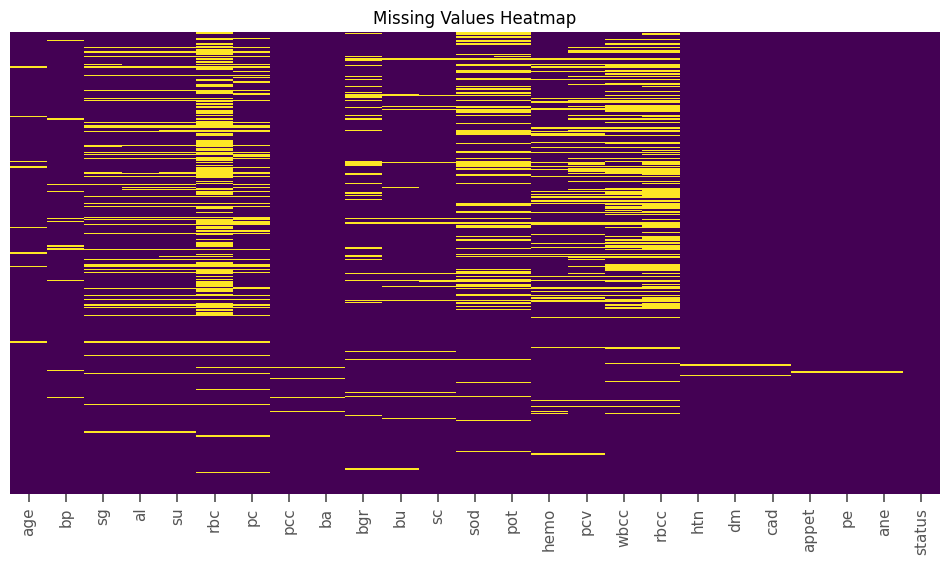

In [6]:
# Calculate missing values
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

# Visualizing Missing Data Pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

Some **observations**:
- The features *rbc* (Red Blood Cells) and *rbcc* (Red blood cell count) have significant missing data.
- The heatmap suggests that missing values often occur across multiple columns for the same patients.

# Phase 5: Statistical Summary

In [7]:
# Numerical Summary
print(df.describe().T)

      count         mean          std       min      25%      50%      75%  \
age   391.0    51.483376    17.169714     2.000    42.00    55.00    64.50   
bp    388.0    76.469072    13.683637    50.000    70.00    80.00    80.00   
sg    353.0     1.017408     0.005717     1.005     1.01     1.02     1.02   
al    354.0     1.016949     1.352679     0.000     0.00     0.00     2.00   
su    351.0     0.450142     1.099191     0.000     0.00     0.00     0.00   
bgr   356.0   148.036517    79.281714    22.000    99.00   121.00   163.00   
bu    381.0    57.425722    50.503006     1.500    27.00    42.00    66.00   
sc    383.0     3.072454     5.741126     0.400     0.90     1.30     2.80   
sod   313.0   137.528754    10.408752     4.500   135.00   138.00   142.00   
pot   312.0     4.627244     3.193904     2.500     3.80     4.40     4.90   
hemo  348.0    12.526437     2.912587     3.100    10.30    12.65    15.00   
pcv   329.0    38.884498     8.990105     9.000    32.00    40.0

In [8]:
# Categorical Summary
print(df.describe(include=['object']).T)

       count unique         top freq
rbc      248      2      normal  201
pc       335      2      normal  259
pcc      396      2  notpresent  354
ba       396      2  notpresent  374
htn      398      2          no  251
dm       398      2          no  261
cad      398      2          no  364
appet    399      2        good  317
pe       399      2          no  323
ane      399      2          no  339
status   400      2         ckd  250


From these statistical summarizes we can deduce some important aspects.
For example: the *age* range from 2 to 90 years, with a mean of 51 years old, the *rbc* value tends to be normal, etc.

# Phase 6: Univariate Analysis
We will visualize the distribution of individual key variables

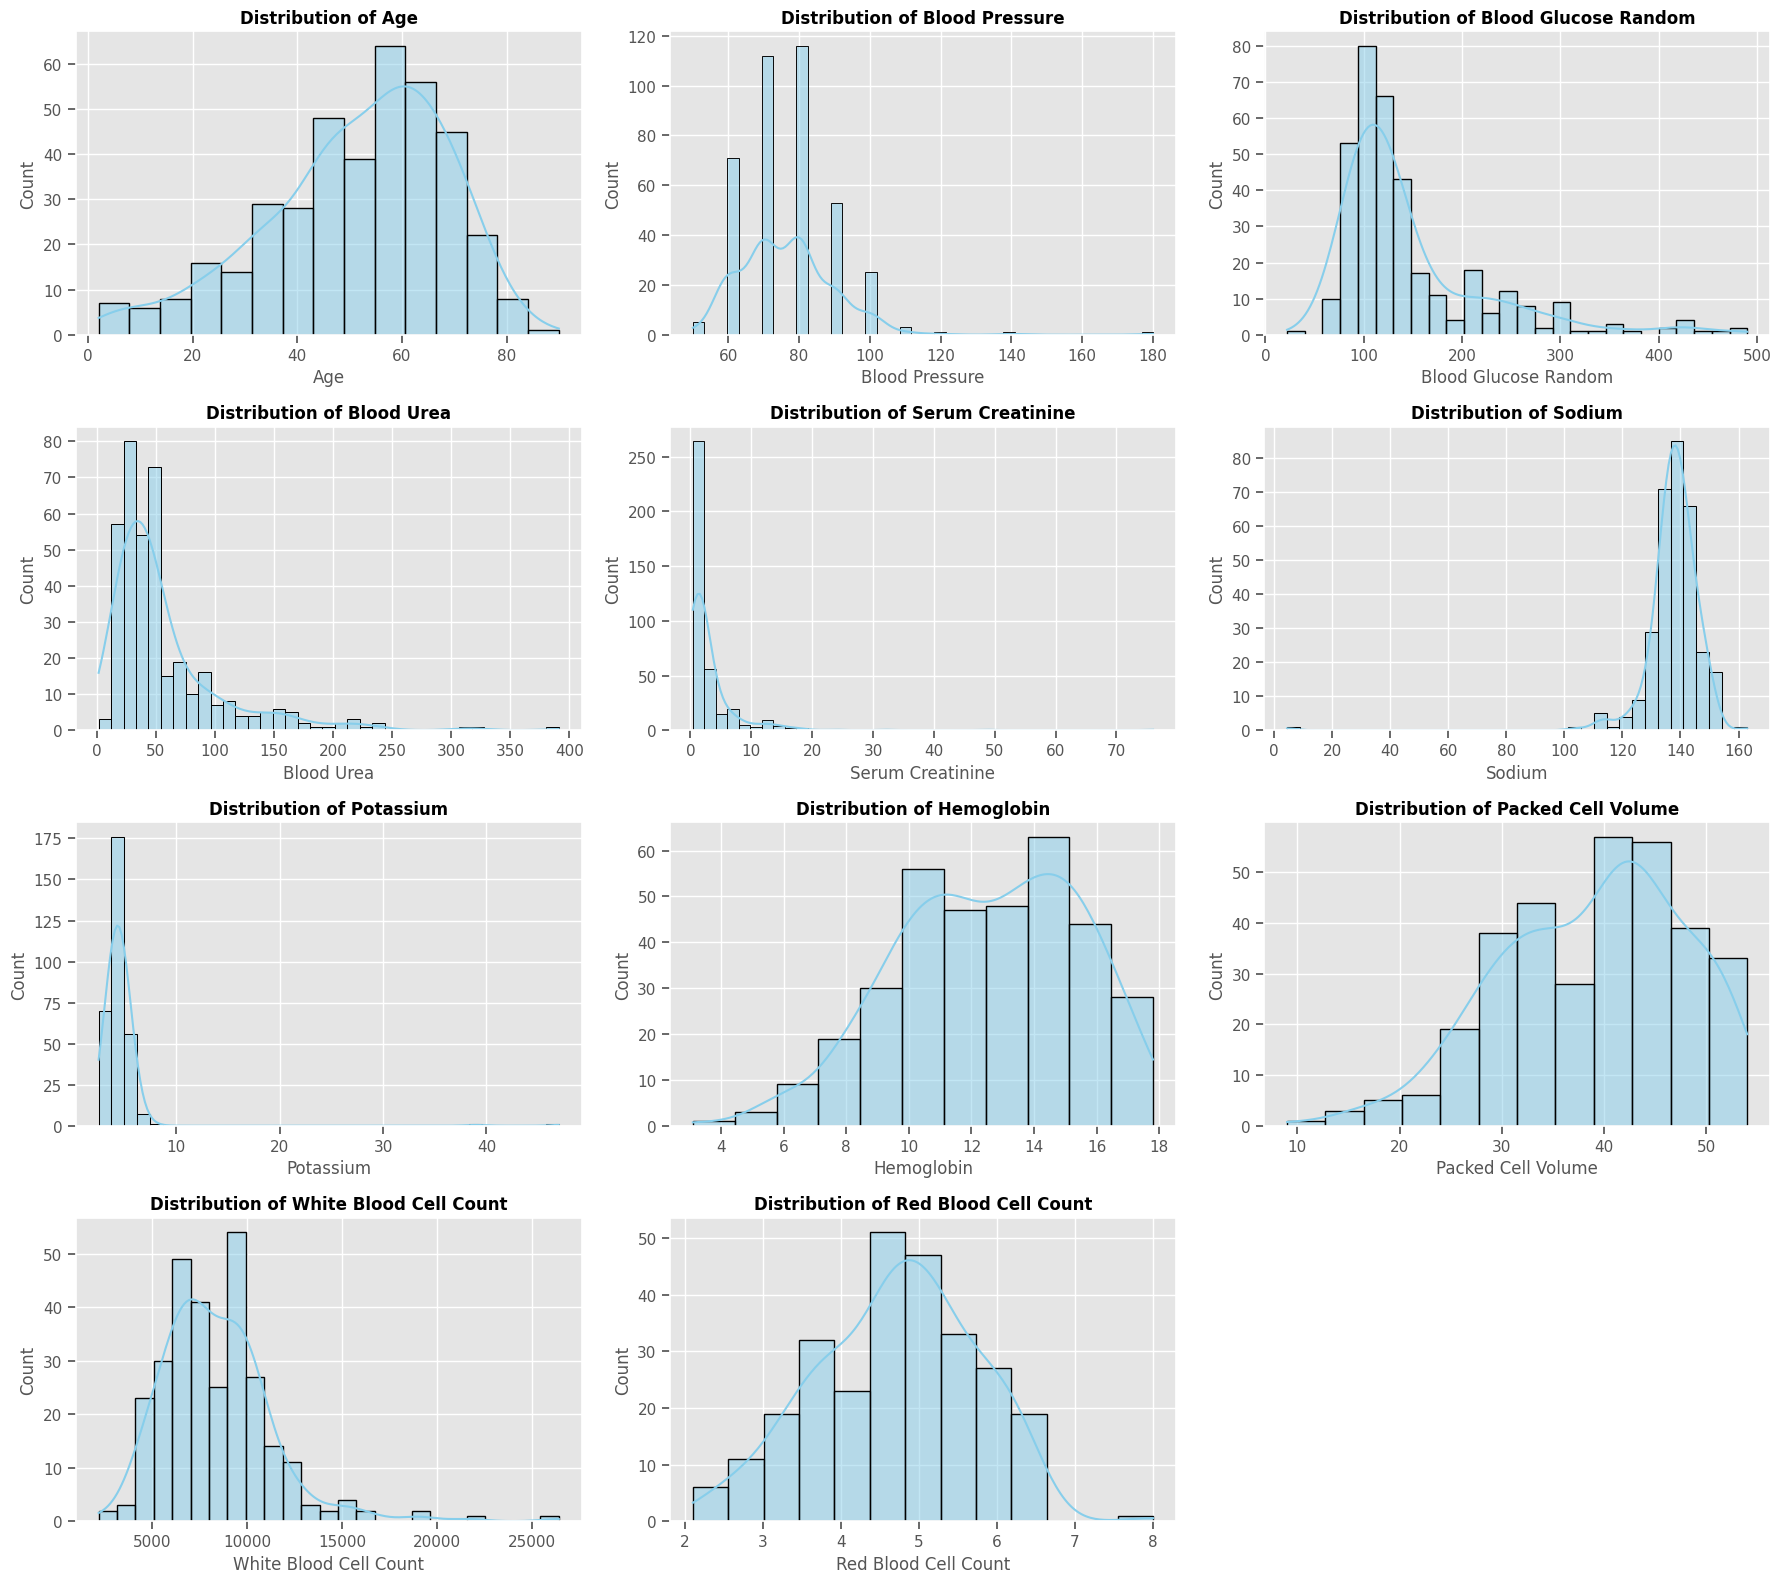

In [9]:
# Dictionary mapping column names to full names based on dataset documentation
numeric_cols_mapping = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count'
}

# Setup the plotting grid (4 rows x 3 columns)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, (col, full_name) in enumerate(numeric_cols_mapping.items()):
    # Plot histogram with KDE
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue', edgecolor='black')

    # Set titles and labels using the full name
    axes[i].set_title(f'Distribution of {full_name}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(full_name)
    axes[i].set_ylabel('Count')

# Remove unused subplots
for j in range(len(numeric_cols_mapping), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


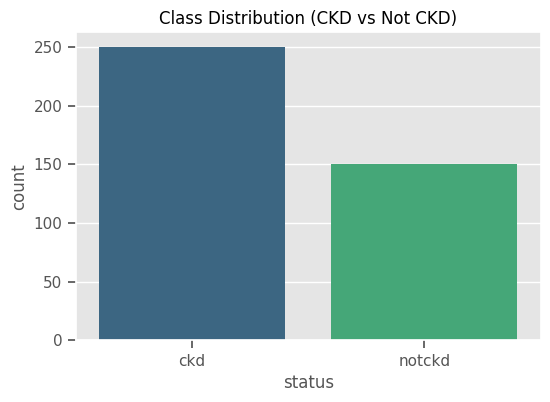

In [10]:
# Plotting Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df, palette='viridis', hue='status')
plt.title('Class Distribution (CKD vs Not CKD)')
plt.show()

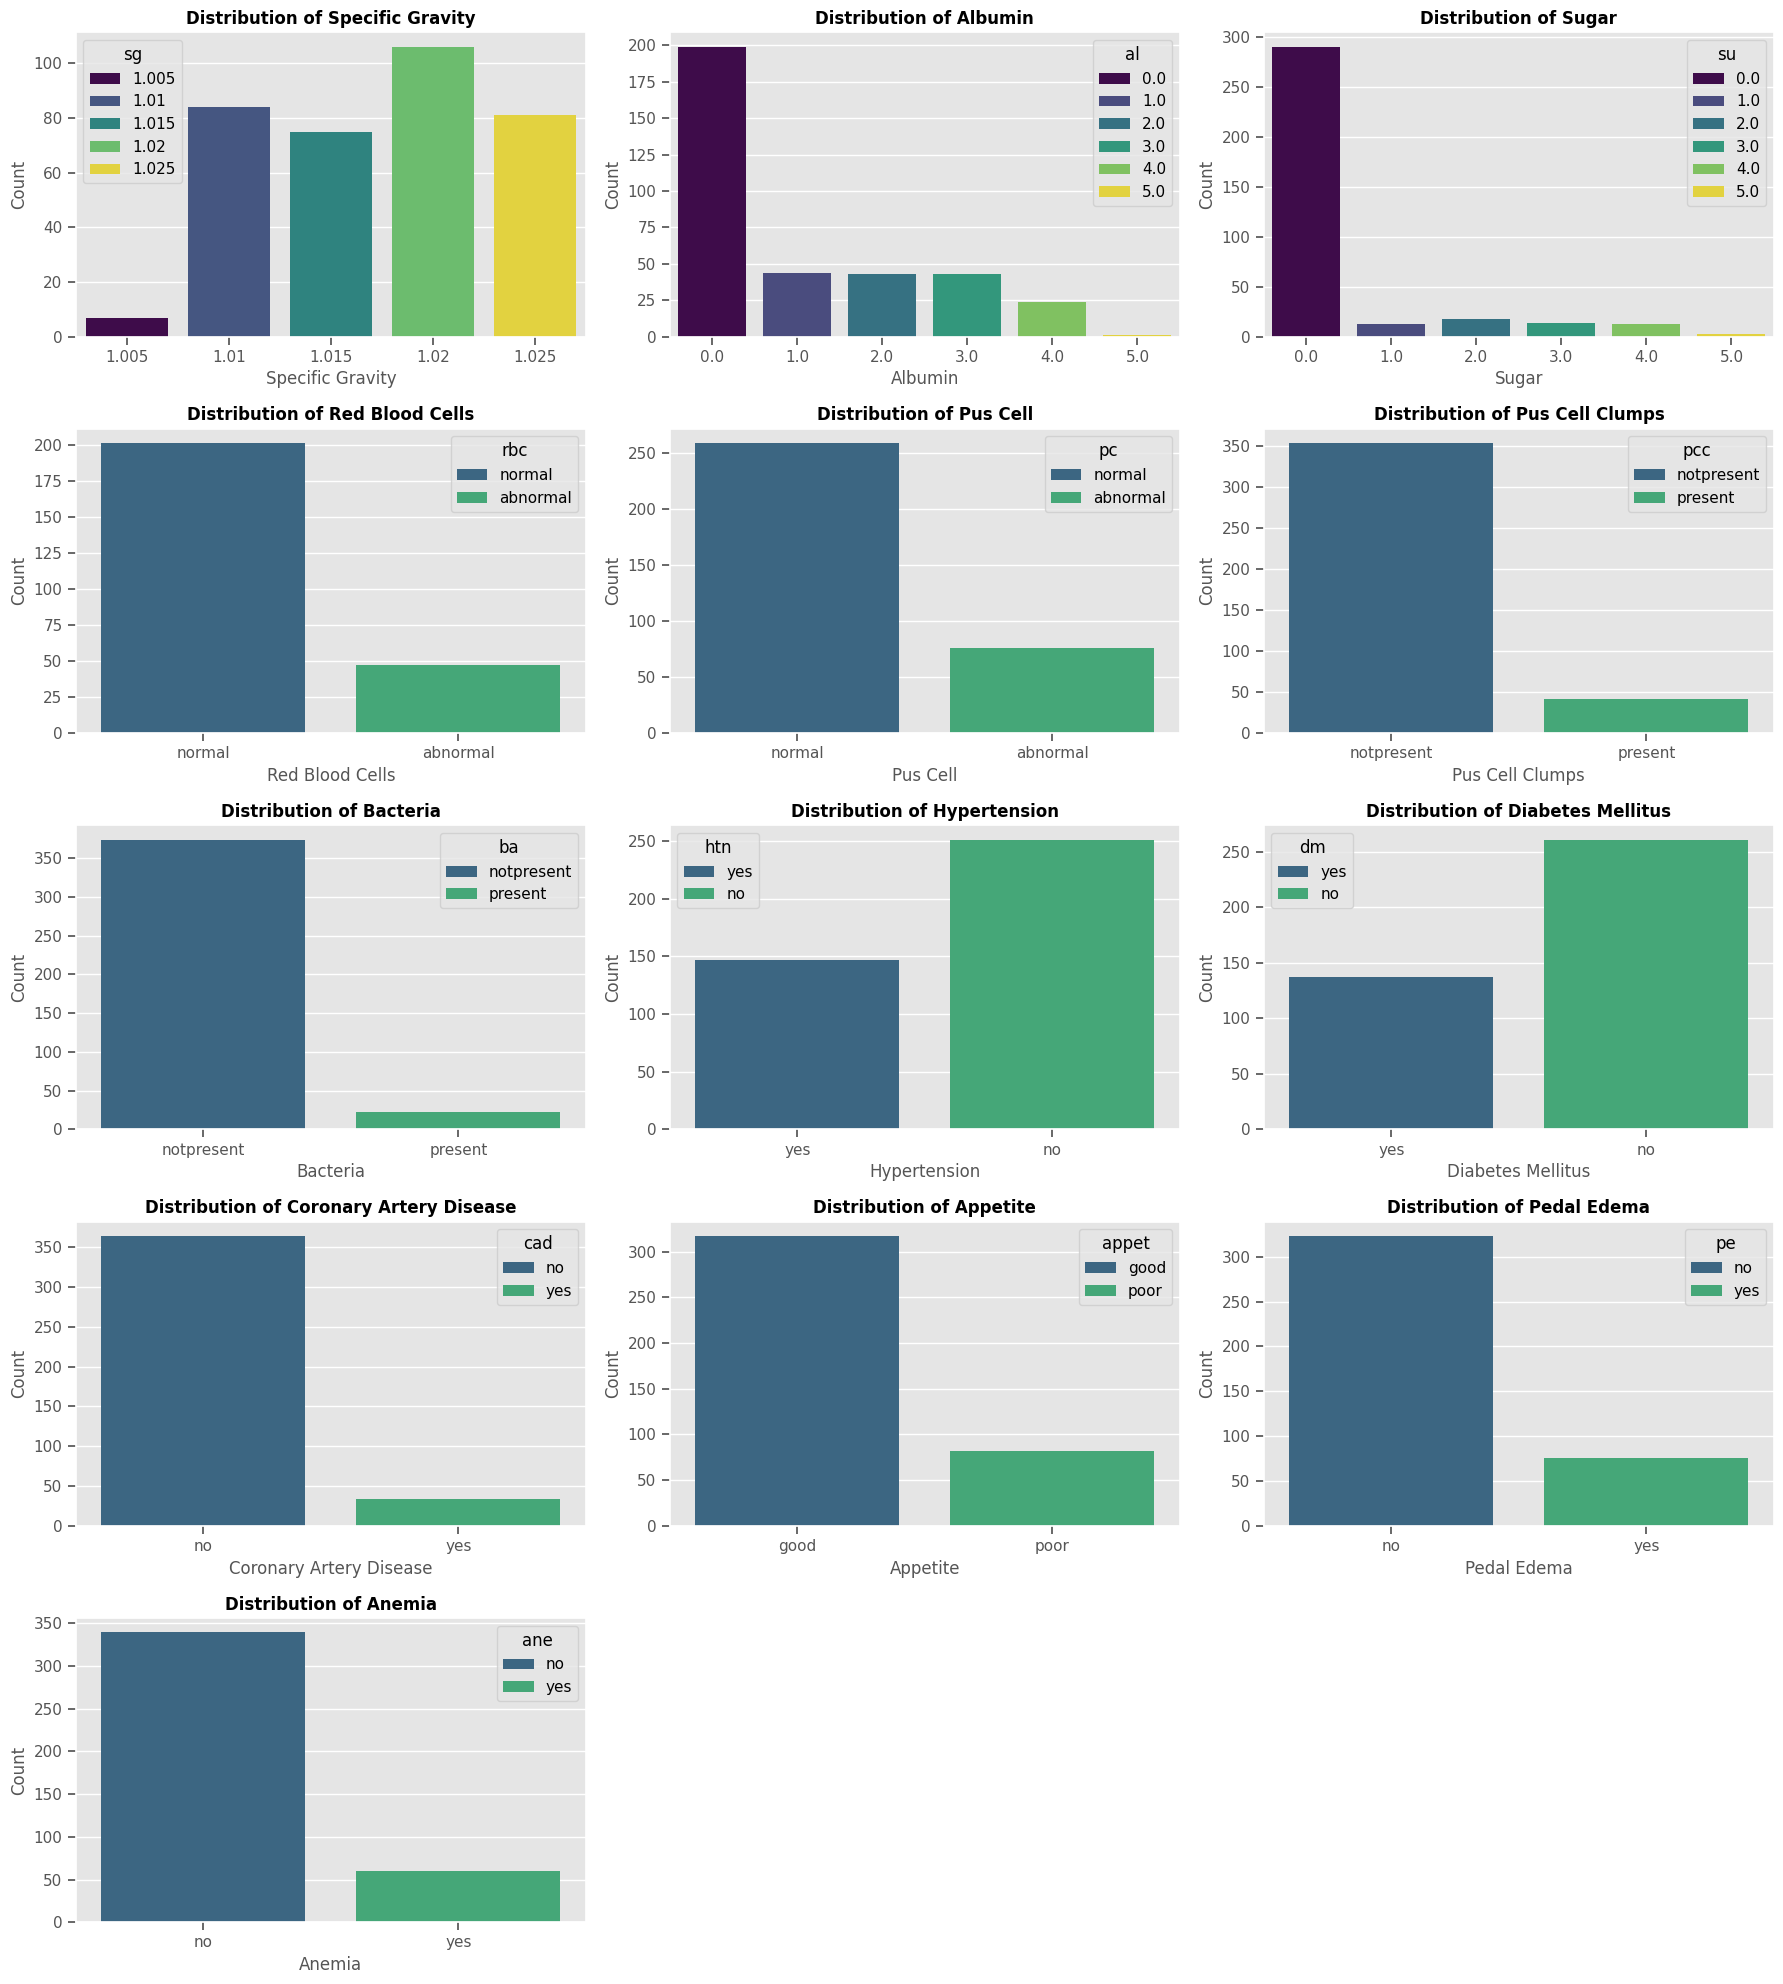

In [11]:
# Dictionary mapping categorical columns to full names
categorical_cols_mapping = {
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia'
}

# Setup the plotting grid (5 rows x 3 columns)
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

for i, (col, full_name) in enumerate(categorical_cols_mapping.items()):
    # Sort order for ordinal variables (sg, al, su) to make the plot logical
    order = sorted(df[col].dropna().unique()) if col in ['sg', 'al', 'su'] else None

    # Create Count Plot
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis', order=order, hue= col)

    # Styling
    axes[i].set_title(f'Distribution of {full_name}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(full_name)
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(len(categorical_cols_mapping), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Phase 7: Correlations

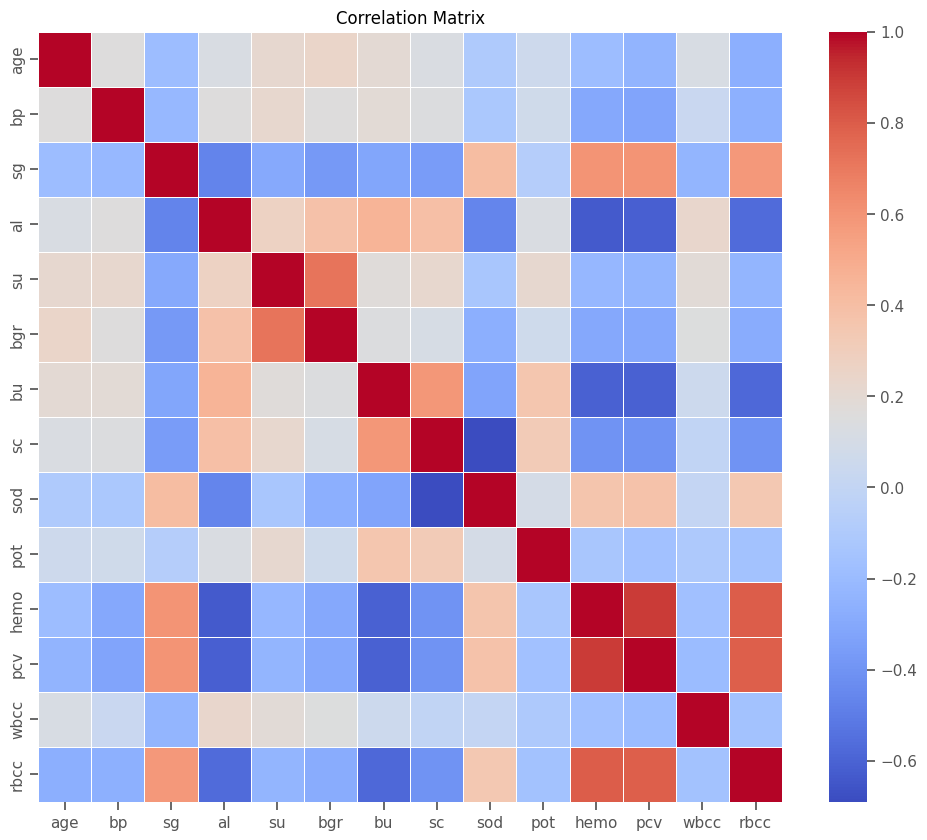

In [12]:
# Correlation Matrix
# Note: 'sg', 'al', 'su' are ordinal but encoded as float, so they appear here naturally.
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- *Hemoglobin (hemo)* and *PCV* have a strong positive correlation.
- *Serum Creatinine (sc)* and *Blood Urea (bu)* have a strong positive correlation too.
- *Specific Gravity (sg)* shows negative correlation with markers like *bu* and *sc*.

# DATA PREPARATION

## Missing values analysis


       Total  Percent
rbc      152    38.00
rbcc     131    32.75
wbcc     106    26.50
pot       88    22.00
sod       87    21.75
pcv       71    17.75
pc        65    16.25
hemo      52    13.00
su        49    12.25
sg        47    11.75
al        46    11.50
bgr       44    11.00
bu        19     4.75
sc        17     4.25
bp        12     3.00
age        9     2.25
pcc        4     1.00
ba         4     1.00
htn        2     0.50
dm         2     0.50
cad        2     0.50
appet      1     0.25
pe         1     0.25
ane        1     0.25


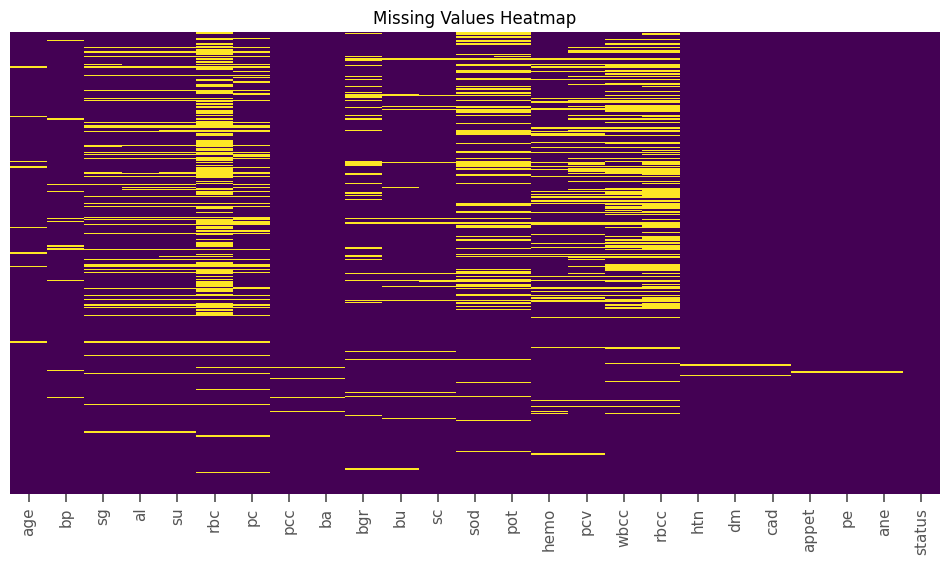

In [63]:
# Calculate missing values
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.concat([missing_count, missing_percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

# Visualizing Missing Data Pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

We have 1012 missing values in total. Missingness affects 14 numeric and 10 categorical variables. Among the numeric features, the highest missing counts occur in 
- **red blood cell count (rbcc, 131)** 
- **white blood cell count (wbcc, 106)**
- **potassium (pot, 88)**
- **sodium (sod, 87)**
- **packed cell volume (pcv, 71)**
- **hemoglobin (hemo, 52)**
- **albumin (al, 46)**
- **random blood glucose (bgr, 44)**
- **blood urea (bu, 19)**
- **serum creatinine (sc, 17)**
- **blood pressure (bp, 12)**
- **age (age, 9)**

For categorical variables, missingness is mainly concentrated in 
- **red blood cells (rbc, 152)**
- **sugar (su, 49)**
- **specific gravity (sg, 47)**
- **pus cell (pc, 65)**
- **pus cell clumps (pcc, 4)**
- **bacteria (ba, 4)**
- **hypertension (htn, 2)**
- **diabetes mellitus (dm, 2)**
- **coronary artery disease (cad, 2)**
- **appetite (appet, 1)**
- **pedal edema (pe, 1)**
- **anemia (ane, 1)**.


####  **Check if missingness is predictive**

For each feature, we tested whether being missing is associated with the class (CKD vs not CKD).

In [65]:
# Missing % per column within each class
miss_by_class = (
    df.isna()
    .groupby(df["status"])
    .mean()
    .T * 100
)

# Keep only columns that have any missing values
miss_by_class = miss_by_class.loc[missing_data.index]

# Add a "gap" column (absolute difference between classes)
# (works even if order is not exactly ckd/notckd)
cols = miss_by_class.columns.tolist()
if len(cols) == 2:
    miss_by_class["gap_%"] = (miss_by_class[cols[0]] - miss_by_class[cols[1]]).abs()

miss_by_class.sort_values("gap_%" if "gap_%" in miss_by_class.columns else cols[0], ascending=False).head(20)


status,ckd,notckd,gap_%
rbc,57.2,6.000000,51.200000
rbcc,49.6,4.666667,44.933333
wbcc,39.6,4.666667,34.933333
pot,33.2,3.333333,29.866667
sod,32.8,3.333333,29.466667
pcv,26.8,2.666667,24.133333
pc,22.4,6.000000,16.400000
hemo,18.4,4.000000,14.400000
su,17.6,3.333333,14.266667
sg,16.8,3.333333,13.466667


From the previous table we can infer that missingness is not random. It is systematically higher in the CKD group for many variables. 

## Choose an imputation strategy

Imputation is the process of replacing missing entries (NaNs) with acceptable values so the dataset can be used for downstream analysis and modeling. Instead of deleting incomplete rows (which can shrink the dataset and introduce bias) we estimate missing values using other variables. The key idea is that missing data is rarely random in clinical datasets, many variables are clinically connected (e.g., hemoglobin and anemia). Therefore, we chose imputation strategies that respect medical relationships and preserve realistic combinations of values.


Before imputing we will examine the clinical structure of features.

## Clinical interpretation of variables

The attributes can be broadly interpreted as reflecting different components of routine clinical evaluation in patients with suspected renal disease.

- **Demographic and vital sign information** includes `age` and `blood pressure`, both of which are well-established risk factors for CKD progression. `Blood pressure` reflects both a potential cause and a consequence of impaired renal function.

- **Urinalysis variables** constitute a substantial portion of the dataset and include `specific gravity`, `albumin`, `sugar`, `red blood cells`, `pus cells clumps` and `bacteria`. These variables provide direct evidence of renal damage or urinary tract pathology. Although some of these attributes are encoded as nominal variables, several of them represent ordinal or semi-quantitative clinical scales.

- **Blood biochemistry markers** include `random blood glucose`, `blood urea`, `serum creatinine`, `sodium` and `potassium`. Among these, `serum creatinine`and `blood urea` are key indicators of renal function and are central to the clinical assessment of CKD. Electrolyte levels may reflect metabolic disturbances associated with reduced kidney function.

- **Hematological parameters** as `hemoglobin`, `packed cell volume`, `white blood cell count`and `red blood cell count` describe systemic effects of CKD such as anema or inflammation. Multiple variables capture related physiological processes reinforcing the clinical relevance of these features.

- **Comorbities and symptoms** as `hypertension`, `diabetes mellitus`, `coronary artery disease`, `appetite status`, `pedal edema`and `anemia`.

The **target variable** (`STATUS`) classifies individuals as having CKD or not.


The interpretation of variables was informed by standard clinical frameworks for CKD assessment, which integrate kidney function, markers of renal damage and systemic complications as describbed in international clinical guidelines (KDIGO).


Kidney Disease: Improving Global Outcomes (KDIGO) CKD Work Group. (2024). KDIGO 2024 Clinical Practice Guideline for the Evaluation and Management of Chronic Kidney Disease. Kidney International, 105(4S), S117–S314. https://doi.org/10.1016/j.kint.2023.10.018

In [17]:
# Clinical profiles grouping based on their physiological and diagnostic role in CKD.
# These profiles guide data preparation decisions (encoding, transformation, missing value handling) 
# and help identify potential sources of data leakage.
clinical_profiles = {
    "demographics": ["age", "bp"],
    "urinalysis": ["sg", "al", "su", "rbc", "pc", "pcc", "ba"],
    "renal_function": ["sc", "bu"],
    "electrolytes": ["sod", "pot"],
    "hematology": ["hemo", "pcv", "wc", "rbcc"],
    "diabetes": ["bgr", "dm", "su"], # `su` reflects glucosuria linked to diabetes and urinalysis
    "cardiovascular": ["htn", "cad", "pe"],
    "clinical_status": ["appet", "ane"]
}
print("\n--- Clinical Profiles ---")
for profile, cols in clinical_profiles.items():
    print(f"{profile.capitalize()}: {cols}")



--- Clinical Profiles ---
Demographics: ['age', 'bp']
Urinalysis: ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba']
Renal_function: ['sc', 'bu']
Electrolytes: ['sod', 'pot']
Hematology: ['hemo', 'pcv', 'wc', 'rbcc']
Diabetes: ['bgr', 'dm', 'su']
Cardiovascular: ['htn', 'cad', 'pe']
Clinical_status: ['appet', 'ane']


### 1. The anemia Profile

Anemia is a common systemic complication kidney disease, primarly resulting from reduced erythropoietin production, impaired iron metabolism and chronic inflammation. As kidney function declines, the bone marrow’s ability to sustain adequate red blood cell production is progressively compromised, leading to reduced oxygen-carrying capacity.

The anemia profile includes the following variables:
- `hemo` which reflects the concentration of oxygen carrying protein in blood and serves as the primary quantitative marker of anemia severity.
- `pcv` (hematocrit) which represents the proportion of blood volume occupied by red blood cells and provides complementary information to hemoglobin levels.
- `rbcc` which quantifies the number of circulating erythrocytes and reflects bone marrow output.
- `ane` binary clinical variable indicating whether anemia has been diagnosed, integrating laboratory values and clinical judgment.

These variables are biologically and physiologically interrelated, as hemoglobin concentration, hematocrit, and red blood cell count jointly describe erythropoietic function and blood oxygen transport. Their inclusion enables the assessment of internal consistency within the anemia profile and supports clinically informed data preparation decisions.

In [18]:
df[["hemo", "pcv", "rbcc"]].corr(method="spearman")

,hemo,pcv,rbcc
hemo,1.000000,0.867755,0.776879
pcv,0.867755,1.000000,0.764204
rbcc,0.776879,0.764204,1.000000


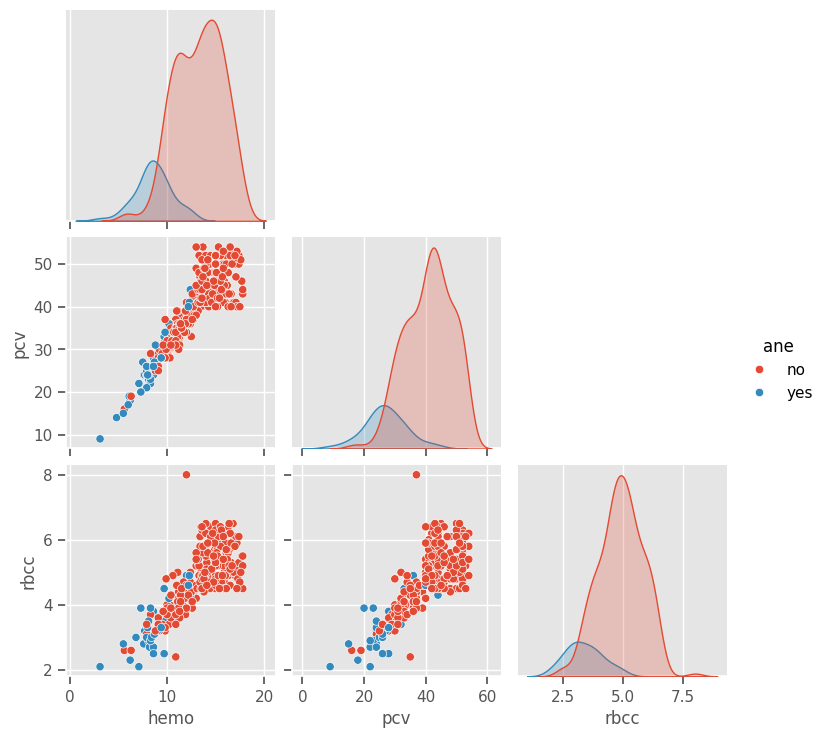

In [19]:
sns.pairplot(
    df,
    vars=["hemo", "pcv", "rbcc"],
    hue="ane",
    corner=True
)

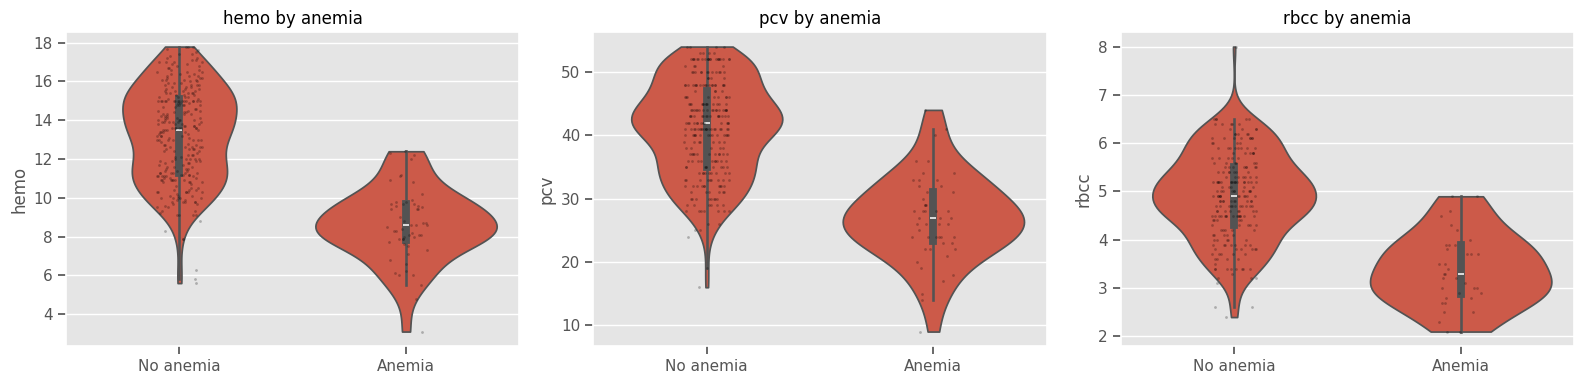

In [75]:
from scipy.stats import spearmanr, pearsonr
#Format p-values for plot text (Spearman/Pearson annotations)
def fmt_p(p): 
    return "< 0.001" if p < 1e-3 else f"= {p:.3f}"

#Clean anemia label + numeric lab values in one expression
ane = (
    df.assign(
        ane=df["ane"].astype("string").str.strip().str.lower(),
        ane_lbl=lambda d: d["ane"].replace({"yes": "Anemia", "no": "No anemia"})
    )
    .assign(**{c: pd.to_numeric(df[c], errors="coerce") for c in ["hemo","pcv","rbcc"]})
    .loc[lambda d: d["ane_lbl"].isin(["Anemia","No anemia"])]
)

#Do the distributions differ between Anemia vs No anemia?” (numeric vs categorical)
#The violin shaped comes in handy to see the distribution's difference
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for ax, x in zip(axes, ["hemo", "pcv", "rbcc"]):
    sns.violinplot(data=ane, x="ane_lbl", y=x, ax=ax, inner="box", cut=0)
    sns.stripplot(data=ane, x="ane_lbl", y=x, ax=ax, color="black", alpha=0.25, size=2)
    ax.set_title(f"{x} by anemia")
    ax.set_xlabel("")
    ax.set_ylabel(x)

plt.tight_layout()
plt.show()


**Conclusion for Anemia Profile**: 

The anemia profile revealed strong positive associations among hemoglobin, packed cell volume and red blood cell count, consistent with their shared physiological role in erythropoiesis. Pairwise Spearman correlations ranged from **0.76** to **0.87**, indicating high internal coherence within this feature group. 

Additionally, individuals labeled as anemic consistently exhibited lower values across all three markers compared to non-anemic individuals. These findings suggest that the anemia-related variables capture a common underlying biological process and that the clinical anemia label aligns well with quantitative laboratory measurements.

### 2. The diabetes and glucose profile

Diabetes mellitus is the leading cause of chronic kidney disease worldwide and represents a major risk factor for both the development and progression of renal dysfunction. Chronic hyperglycemia induces structural and functional damage to the renal microvasculature, ultimately leading to diabetic kidney disease.

- `bgr` a quantitative measure reflecting circulating glucose levels at the time of sampling.
- `dm` a binary clinical variable indicating whether a diagnosis of diabetes has been established.
- `su` a semi-quantitative ordinal variable reflecting glucosuria, which may occur when blood glucose exceeds renal reabsorption capacity.

These three variables are clinically linked, bgr measures glucose directly, su reflects glucose spilling into urine, and both are expected to align with dm.


<Axes: xlabel='dm', ylabel='bgr'>

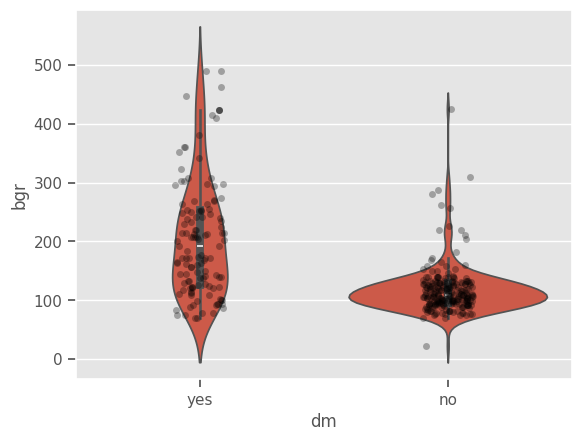

In [20]:
sns.violinplot(data=df, x="dm", y="bgr")
sns.stripplot(data=df, x="dm", y="bgr", color="black", alpha=0.3)


In [21]:
df.groupby("dm")[["bgr"]].describe()


bgr                                                         
     count        mean        std   min    25%    50%    75%    max
dm                                                                 
no   229.0  117.524017  41.416113  22.0   95.0  109.0  129.0  425.0
yes  125.0  204.816000  99.067864  70.0  125.0  192.0  253.0  490.0

In [22]:
pd.crosstab(df["dm"], df["su"], normalize="index")


su,0.0,1.0,2.0,3.0,4.0,5.0
dm,,,,,,
no,0.963265,0.012245,0.012245,0.008163,0.004082,0.000000
yes,0.500000,0.096154,0.144231,0.115385,0.115385,0.028846


The diabetes and glucose profile exhibits a coherent but heterogeneous pattern. Individuals diagnosed with diabetes show higher random blood glucose levels and a markedly higher prevalence of glucosuria. However, substantial overlap between diabetic and non-diabetic groups is observed, particularly for blood glucose measurements, reflecting the use of random (non-fasting) glucose values and inter-individual variability. This heterogeneity highlights the complementary roles of biochemical measurements and clinical diagnosis in characterizing glucose dysregulation.

### 3. The urinalysis profile

Urinalysis plays a central role in the clinical evaluation of chronic kidney disease, as it provides direct evidence of renal damage and alterations in urinary tract physiology. Abnormalities detected in urine may reflect glomerular injury, tubular dysfunction or inflammatory and infectious processes often preceding detectable changes in blood-based markers of renal function.

In the context of CKD, markers such as albuminuria and altered urine concentration capacity are key indicators of kidney damage, while the presence of red blood cells, white blood cells or bacteria may indicate concomitant urinary tract pathology. The urinalysis profile therefore captures both renal-specific and secondary pathological processes relevant to CKD assessment.

The urinalysis profile includes the following variables:
- `sg` an ordinal variable reflecting urine concentration capacity and tubular function.
- `al` a semi-quantitative ordinal measure of albuminuria, which represents a hallmark marker of renal damage.
- `su` an ordinal indicator of glucosuria, reflecting altered renal glucose handling.
- `rbc` indicating hematuria when abnormal.
- `pc`, `pcc`and `ba` which collectively capture inflammatory or infectious processes within the urinary tract.

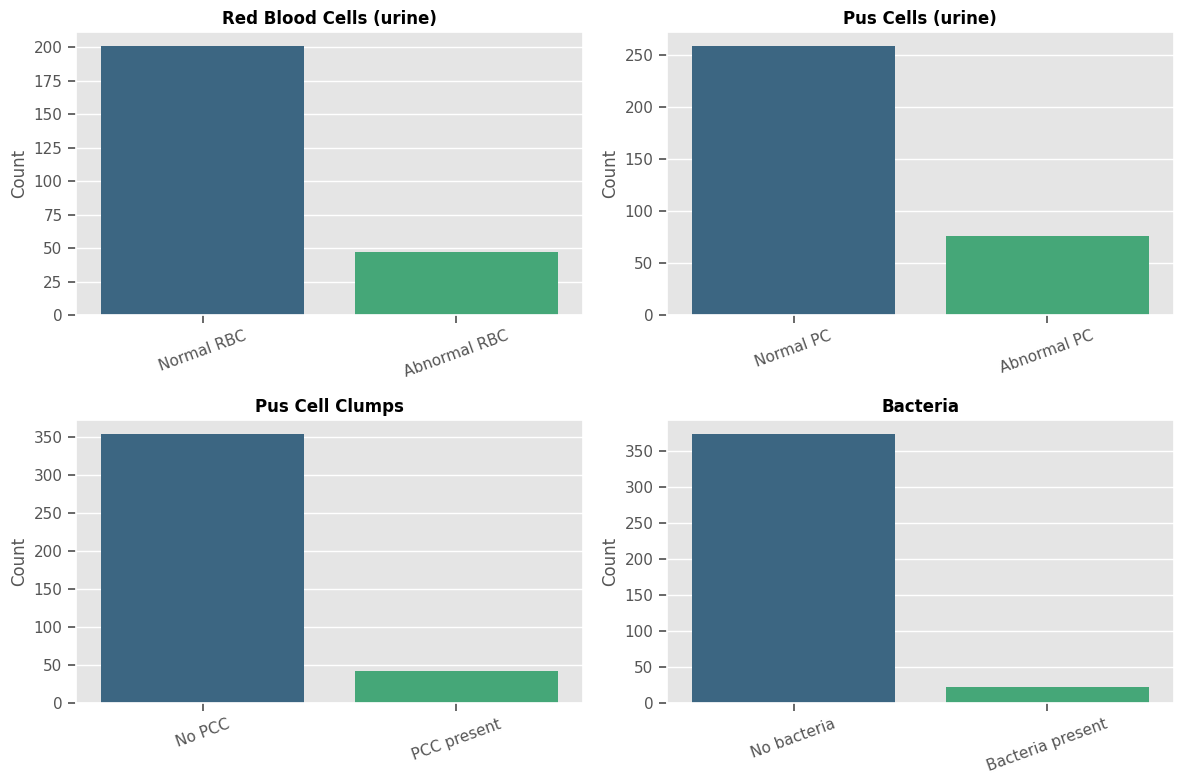

In [86]:
#Let's first define the urinalysis subset
u_cols = ["sg","al","rbc","pc","pcc","ba", "su"]
df_u = df.copy() #a copy of the original dataset

#Labels for plots
df_u["rbc"] = df_u["rbc"].map({"normal":"Normal RBC", "abnormal":"Abnormal RBC"})
df_u["pc"]  = df_u["pc"].map({"normal":"Normal PC", "abnormal":"Abnormal PC"})
df_u["pcc"] = df_u["pcc"].map({"notpresent":"No PCC", "present":"PCC present"})
df_u["ba"]  = df_u["ba"].map({"notpresent":"No bacteria", "present":"Bacteria present"})

#Categorical distributions (rbc, pc, pcc, ba)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, col, title in zip(
    axes,
    ["rbc","pc","pcc","ba"],
    ["Red Blood Cells (urine)", "Pus Cells (urine)", "Pus Cell Clumps", "Bacteria"]
):
    sns.countplot(data=df_u, x=col, hue=col, ax=ax, palette="viridis", dodge=False, legend=False)
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()

Most patients have normal `rbc`, `pc`, `no pcc` and `no ba` while a small group of people show abnormal `rbc` and `pc` and the presence of `pcc` and `ba`.

In [23]:
df[clinical_profiles["urinalysis"]].isna().mean().sort_values(ascending=False)


rbc    0.3800
pc     0.1625
su     0.1225
sg     0.1175
al     0.1150
pcc    0.0100
ba     0.0100
dtype: float64

Missingness in urinalysis variables is uneven and likely clinically driven rather than random.

In [24]:
df["al"].value_counts(dropna=False).sort_index()
df["sg"].value_counts(dropna=False).sort_index()


sg
1.005      7
1.010     84
1.015     75
1.020    106
1.025     81
NaN       47
Name: count, dtype: int64

Specific gravity behaves as an ordered categorical variable with clinically meaningful discrete levels.

In [25]:
pd.crosstab(df["status"], df["al"], normalize="index")


al,0.0,1.0,2.0,3.0,4.0,5.0
status,,,,,,
ckd,0.258373,0.210526,0.205742,0.205742,0.114833,0.004785
notckd,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Albuminuria was exclusively observed among individuals classified as having CKD, indicating a strong association between albumin levels and disease status.

In [27]:
pd.crosstab(df["status"], df["rbc"], normalize="index")


rbc,abnormal,normal
status,,
ckd,0.439252,0.560748
notckd,0.000000,1.000000


Abnormal urinary red blood cells were present in a substantial subset of CKD patients but were absent among non-CKD individuals.

Exploratory analysis of the urinalysis profile revealed heterogeneous patterns across variables. Missing values were unevenly distributed, with microscopic urine parameters such as red blood cells showing a notably higher proportion of missingness, suggesting clinically driven measurement practices rather than random absence of data.

Ordinal markers such as specific gravity displayed clinically plausible discrete distributions, reflecting variability in urine concentration capacity. Albuminuria showed a strong association with CKD status, as all non-CKD individuals exhibited normal albumin levels, whereas varying degrees of albuminuria were observed exclusively among CKD cases.

Similarly, abnormal urinary red blood cells were present in a substantial subset of individuals with CKD but were absent in the non-CKD group, indicating that hematuria represents a frequent but not universal manifestation of renal pathology.

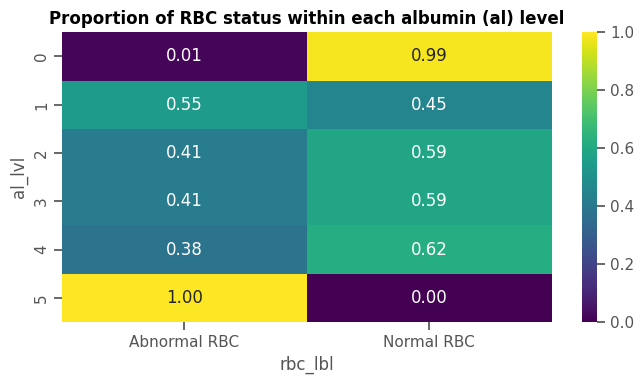

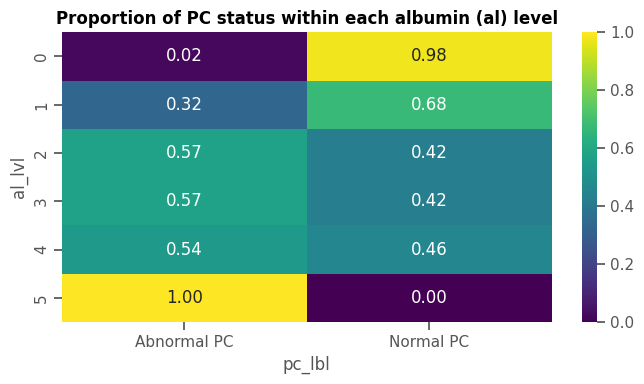


Chi-square rbc_lbl vs pc_lbl: chi2=40.946, dof=1, p=1.565e-10, Cramer's V=0.414


pc_lbl,Abnormal PC,Normal PC
rbc_lbl,,
Abnormal RBC,28,17
Normal RBC,30,164


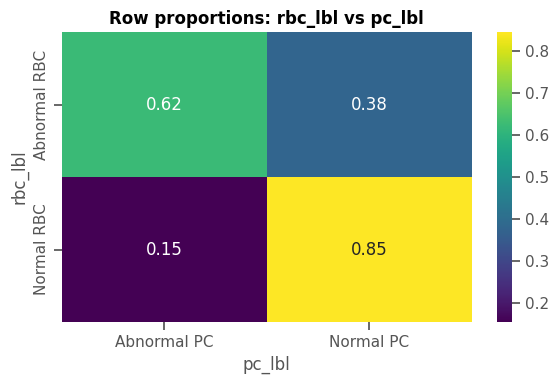


Chi-square pc_lbl vs pcc_lbl: chi2=84.227, dof=1, p=4.411e-20, Cramer's V=0.504


pcc_lbl,No PCC,PCC present
pc_lbl,,
Abnormal PC,43,33
Normal PC,248,8


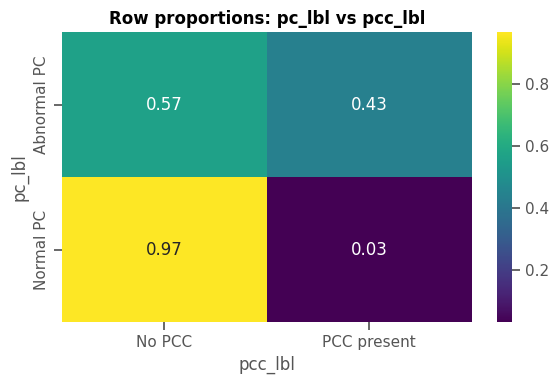


Chi-square pcc_lbl vs ba_lbl: chi2=26.072, dof=1, p=3.289e-07, Cramer's V=0.257


ba_lbl,Bacteria present,No bacteria
pcc_lbl,,
No PCC,12,342
PCC present,10,32


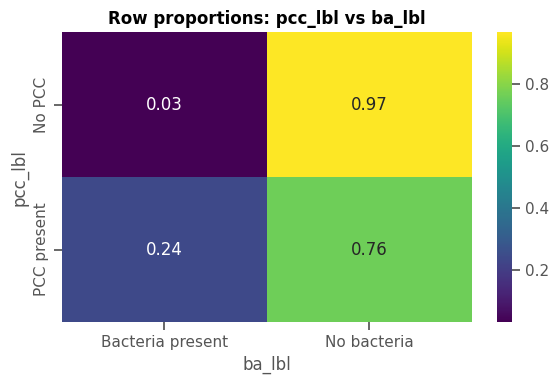


Chi-square pc_lbl vs ba_lbl: chi2=32.928, dof=1, p=9.565e-09, Cramer's V=0.315


ba_lbl,Bacteria present,No bacteria
pc_lbl,,
Abnormal PC,16,60
Normal PC,5,251


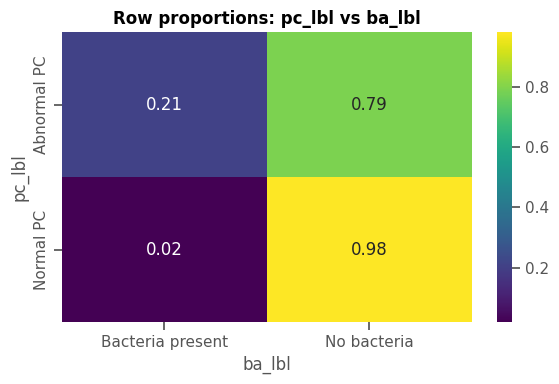


Spearman(sg, al): rho=-0.520, p=1.184e-25, n=351


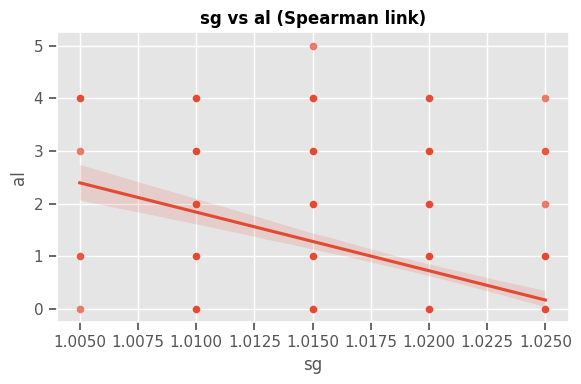

In [90]:
#Let's first define the urinalysis subset
u_cols = ["sg","al","rbc","pc","pcc","ba"]
df_u = df.copy() #a copy of the original dataset

#make sg/al numeric
df_u["sg"] = pd.to_numeric(df_u["sg"], errors="coerce")
df_u["al"] = pd.to_numeric(df_u["al"], errors="coerce")

#keep plausible ranges only
df_u.loc[~df_u["sg"].isin([1.005, 1.010, 1.015, 1.020, 1.025]), "sg"] = np.nan
df_u.loc[~df_u["al"].between(0, 5), "al"] = np.nan

#Labels for plots
df_u["rbc_lbl"] = df_u["rbc"].map({"normal":"Normal RBC", "abnormal":"Abnormal RBC"})
df_u["pc_lbl"]  = df_u["pc"].map({"normal":"Normal PC", "abnormal":"Abnormal PC"})
df_u["pcc_lbl"] = df_u["pcc"].map({"notpresent":"No PCC", "present":"PCC present"})
df_u["ba_lbl"]  = df_u["ba"].map({"notpresent":"No bacteria", "present":"Bacteria present"})

#Order of the sg and al
sg_order = [1.005, 1.010, 1.015, 1.020, 1.025]
al_order = [0, 1, 2, 3, 4, 5]

# Heatmaps: proportions (easy “proof” visuals)
#   1) P(Abnormal RBC | al level)
#   2) P(Abnormal PC  | al level)
def prop_heatmap(df_in, level_col, target_col, target_positive, level_order=None, title=""):
    tmp = df_in[[level_col, target_col]].dropna()
    ct = pd.crosstab(tmp[level_col], tmp[target_col], normalize="index")
    if level_order is not None:
        ct = ct.reindex(level_order)
    plt.figure(figsize=(7,4))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap="viridis")
    plt.title(title, fontweight="bold")
    plt.ylabel(level_col)
    plt.xlabel(target_col)
    plt.tight_layout()
    plt.show()
    return ct

#albumin levels → probability of abnormal findings
ct_rbc_al = prop_heatmap(
    df_u.assign(al_lvl=df_u["al"]),
    "al_lvl", "rbc_lbl", "Abnormal RBC",
    level_order=al_order,
    title="Proportion of RBC status within each albumin (al) level"
)

ct_pc_al = prop_heatmap(
    df_u.assign(al_lvl=df_u["al"]),
    "al_lvl", "pc_lbl", "Abnormal PC",
    level_order=al_order,
    title="Proportion of PC status within each albumin (al) level"
)

#Categorical ↔ categorical links (chi-square + Cramer's V)
#RBC vs PC, PC vs PCC, PCC vs Bacteria, PC vs Bacteria
pairs = [
    ("rbc_lbl","pc_lbl"),
    ("pc_lbl","pcc_lbl"),
    ("pcc_lbl","ba_lbl"),
    ("pc_lbl","ba_lbl"),
]

def cramers_v_from_table(ct):
    # ct = pd.crosstab(...)
    chi2, p, dof, _ = chi2_contingency(ct)
    n = ct.to_numpy().sum()
    r, k = ct.shape
    v = np.sqrt(chi2 / (n * (min(r-1, k-1))))
    return chi2, p, dof, v

for a, b in pairs:
    tmp = df_u[[a,b]].dropna()
    ct = pd.crosstab(tmp[a], tmp[b])
    chi2, p, dof, v = cramers_v_from_table(ct)
    print(f"\nChi-square {a} vs {b}: chi2={chi2:.3f}, dof={dof}, p={p:.3e}, Cramer's V={v:.3f}")
    display(ct)

    # quick proportion heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(pd.crosstab(tmp[a], tmp[b], normalize="index"), annot=True, fmt=".2f", cmap="viridis")
    plt.title(f"Row proportions: {a} vs {b}", fontweight="bold")
    plt.tight_layout()
    plt.show()



# sg <-> al (both ordinal-ish)
tmp = df_u[["sg","al"]].dropna()
rho, p = spearmanr(tmp["sg"], tmp["al"])
print(f"\nSpearman(sg, al): rho={rho:.3f}, p={p:.3e}, n={len(tmp)}")

plt.figure(figsize=(6,4))
sns.scatterplot(data=tmp, x="sg", y="al", alpha=0.7)
sns.regplot(data=tmp, x="sg", y="al", scatter=False)
plt.title("sg vs al (Spearman link)", fontweight="bold")
plt.tight_layout()
plt.show()

From the `sg` vs `al` Spearman link  we observed a strong negative monotonic association between them (Spearman ρ = −0.520, p = 1.184e-25; n = 351), meaning that higher albumin levels tend to appear alongside lower `sg`. Moreover, the categorical urinalysis markers also clustered together rather than behaving independently. Chi-square tests showed strong associations such as `pc` vs `pcc` (V = 0.504, p = 4.411e-20) and `rbc` vs `pc` (V = 0.414, p = 1.565e-10), with additional links involving `ba` (`pc` vs `ba`, V = 0.315, p = 9.565e-09; `pcc` vs `ba`, V = 0.257, p = 3.289e-07). Visually, the `pc` vs `ba` heatmap reinforced that `ba` presence was much more frequent when pus cells were abnormal (~21% vs ~2%).

### 4. The renal function profile

Assessment of renal function is central to the diagnosis and staging of chronic kidney disease. Reduced glomerular filtration leads to the accumulation of nitrogenous waste products in blood, most notably creatinine and urea. These biomarkers are routinely used in clinical practice to evaluate kidney function and constitute the basis for estimating glomerular filtration rate.

In this dataset, renal function is primarily characterized using serum creatinine and blood urea levels. These variables provide a functional assessment of kidney clearance capacity and are expected to be strongly associated with CKD status.

The renal function profile includes the following variables:
- `sc` a blood biomarker reflecting the accumulation of creatinine due to reduced renal clearance.
- `bu` a nitrogenous waste product whose concentration increases with impaired kidney function and altered protein metabolism.

<Axes: xlabel='sc', ylabel='Count'>

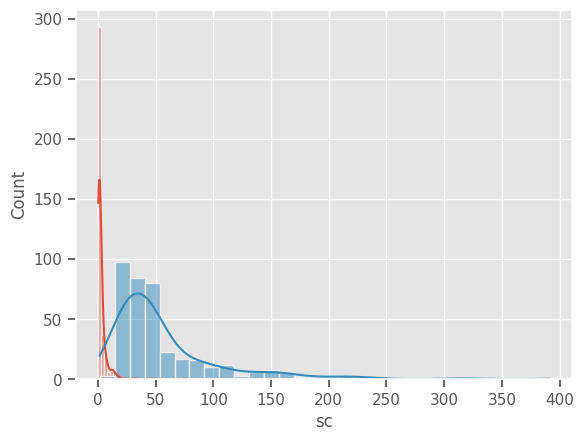

In [28]:
sns.histplot(df["sc"], bins=30, kde=True)
sns.histplot(df["bu"], bins=30, kde=True)


Serum creatinine displays a strongly right-skewed distribution, reflecting the accumulation of extreme values in individuals with advanced renal impairment.

The right tail of the creatinine distribution is driven almost exclusively by CKD cases. There is minimal overlap between CKD and non-CKD groups in terms of serum creatinine.

<Axes: xlabel='status', ylabel='sc'>

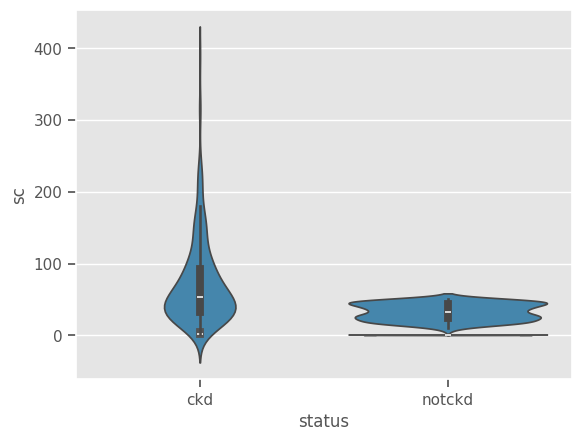

In [29]:
sns.violinplot(data=df, x="status", y="sc")
sns.violinplot(data=df, x="status", y="bu")



MWU tests (Not CKD vs CKD) + rank-biserial:
 bu: U=8486.5, p=1.869e-16, rbc=0.503 | median NotCKD=33 vs CKD=53
 sc: U=2668.5, p=6.578e-44, rbc=0.845 | median NotCKD=0.9 vs CKD=2.25


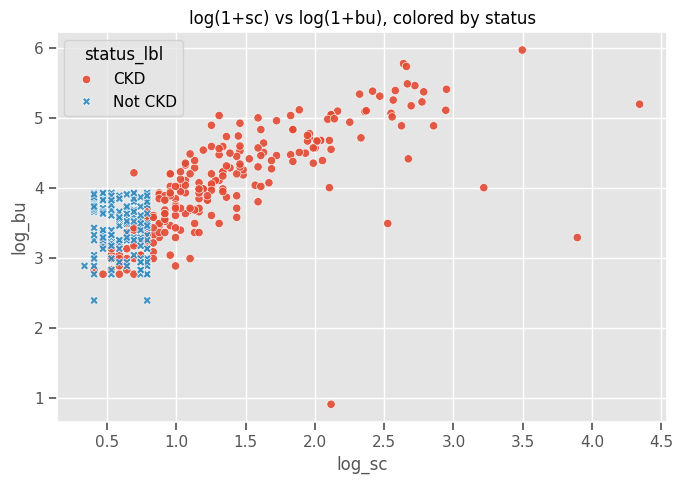

In [94]:
d = df.copy() #working with the copy of the original dataset 

#Standardize labels
d["status_lbl"] = d["status"].astype(str).str.strip().str.lower().map({
    "ckd": "CKD",
    "notckd": "Not CKD",
    "not ckd": "Not CKD"
})

#Numeric columns for this profile
kidney_cols = ["bu", "sc"]
for c in kidney_cols:
    d[c] = pd.to_numeric(d[c], errors="coerce")

#Keep rows that have status + at least one marker
dk = d.dropna(subset=["status_lbl"])
#keep only CKD/Not CKD
dk = dk[dk["status_lbl"].isin(["CKD", "Not CKD"])]

# MWU tests + rank-biserial effect size
def rank_biserial_from_u(U, n1, n2):
    # RBC = 1 - 2U/(n1*n2) when U is for group1 vs group2
    return 1 - (2 * U) / (n1 * n2)

print("\nMWU tests (Not CKD vs CKD) + rank-biserial:")
for c in kidney_cols:
    a = dk.loc[dk["status_lbl"]=="Not CKD", c].dropna()
    b = dk.loc[dk["status_lbl"]=="CKD", c].dropna()
    if len(a) < 5 or len(b) < 5:
        print(f" {c}: not enough data")
        continue

    U, p = mannwhitneyu(a, b, alternative="two-sided")
    rbc = rank_biserial_from_u(U, len(a), len(b))
    print(f" {c}: U={U:.1f}, p={p:.3e}, rbc={rbc:.3f} | median NotCKD={np.median(a):g} vs CKD={np.median(b):g}")

#Scatter proof: log(1+sc) vs log(1+bu)
tmp = dk.dropna(subset=["sc","bu"]).copy()
tmp["log_sc"] = np.log1p(tmp["sc"])
tmp["log_bu"] = np.log1p(tmp["bu"])

plt.figure(figsize=(7,5))
sns.scatterplot(data=tmp, x="log_sc", y="log_bu", hue="status_lbl", style="status_lbl", alpha=0.9)
plt.title("log(1+sc) vs log(1+bu), colored by status")
plt.tight_layout()
plt.show()

In our data, serum creatinine (`sc`) is the significant kidney marker because it is much higher in CKD than non-CKD (median 2.25 vs 0.9, MWU p ≈ 2e−46). Blood urea (`bu`) also separates the groups well (median 53 vs 33, p ≈ 1e−18). Since our data it was strongly right-skewed logs are used to respond to skewness towards large values; e.g., cases in which one or a few points are much larger than the bulk of the data.

In [30]:
df.groupby("status")[["sc", "bu"]].describe()


sc                                                       bu  \
        count      mean       std  min    25%   50%   75%   max  count   
status                                                                   
ckd     238.0  4.414916  6.950275  0.5  1.425  2.25  4.55  76.0  237.0   
notckd  145.0  0.868966  0.255092  0.4  0.600  0.90  1.10   1.2  144.0   

                                                              
             mean        std   min    25%   50%   75%    max  
status                                                        
ckd     72.389030  58.587236   1.5  32.00  53.0  93.0  391.0  
notckd  32.798611  11.450459  10.0  23.75  33.0  44.0   50.0

CKD is associated with both elevated and highly variable creatinine levels, whereas non-CKD individuals show stable and physiologically constrained values. Serum creatinine appears more discriminative of CKD status than blood urea, consistent with its central role in renal function assessment.

### 5. The cardiovascular profile

Cardiovascular disease and altered fluid homeostasis are closely linked to chronic kidney disease. Hypertension represents both a major risk factor for CKD development and a frequent consequence of impaired renal function, while cardiovascular comorbidities often coexist due to shared risk factors and systemic vascular damage. Additionally, reduced renal excretory capacity may lead to fluid retention, clinically manifested as peripheral edema.

This profile captures key cardiovascular conditions and clinical signs related to circulatory and volume regulation, providing contextual information on disease burden and systemic involvement.

The cardiovascular and fluid balance profile includes the following variables:
- `htn` a binary clinical diagnosis indicating the presence of elevated blood pressure.
- `cad` eflecting established cardiovascular pathology.
- `pe` a clinical sign of fluid retention commonly associated with impaired renal and cardiac function.
- `bp` is a key numeric marker that aligns with cardiovascular comorbidities.

These variables represent clinically interpreted conditions rather than direct laboratory measurements and are expected to be more heterogeneous and less tightly correlated than biochemical markers.

In [34]:
pd.crosstab(df["status"], df["htn"], normalize="index")
pd.crosstab(df["status"], df["cad"], normalize="index")
pd.crosstab(df["status"], df["pe"], normalize="index")


pe,no,yes
status,,
ckd,0.696,0.304
notckd,1.000,0.000


In [35]:
pd.crosstab(df["htn"], df["pe"], normalize="index")


pe,no,yes
htn,,
no,0.920000,0.080000
yes,0.619048,0.380952


Pedal edema was observed exclusively among CKD patients, affecting approximately one third of cases, consistent with its role as a clinical manifestation of fluid retention rather than a defining feature of CKD.

Pedal edema was substantially more prevalent among hypertensive individuals, supporting the link between blood pressure dysregulation and fluid retention.

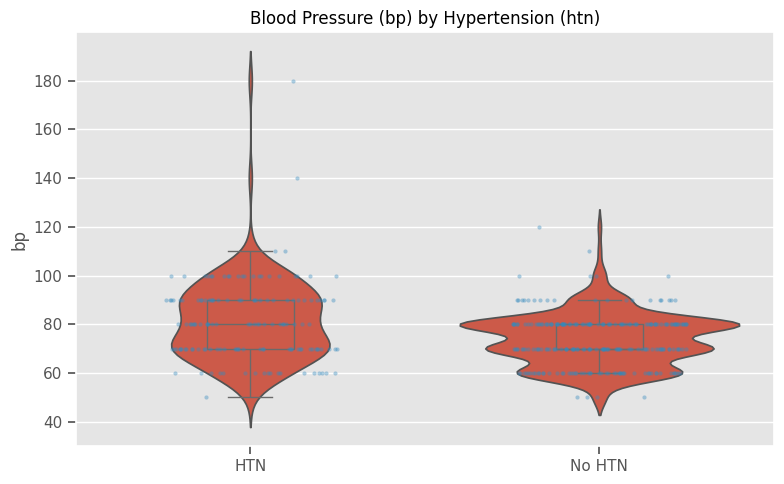

MWU bp by htn (No HTN vs HTN): U=12507.5, p=1.416e-06, rank-biserial=0.284 | n(no)=241, n(yes)=145
median bp No HTN: 70.0 | HTN: 80.0


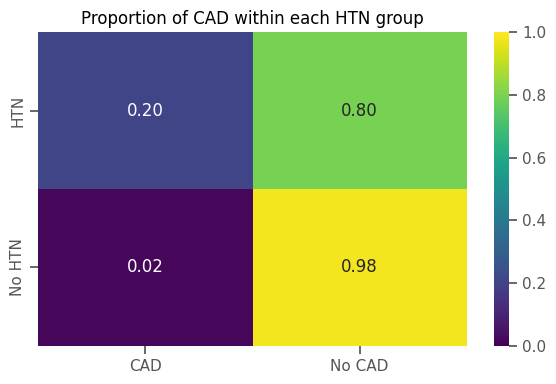


Counts CAD vs HTN:
cad_lbl  CAD  No CAD
htn_lbl             
HTN       30     117
No HTN     4     247

Chi-square test (htn vs cad): chi2=39.629, dof=1, p=3.070e-10, Cramer's V=0.325


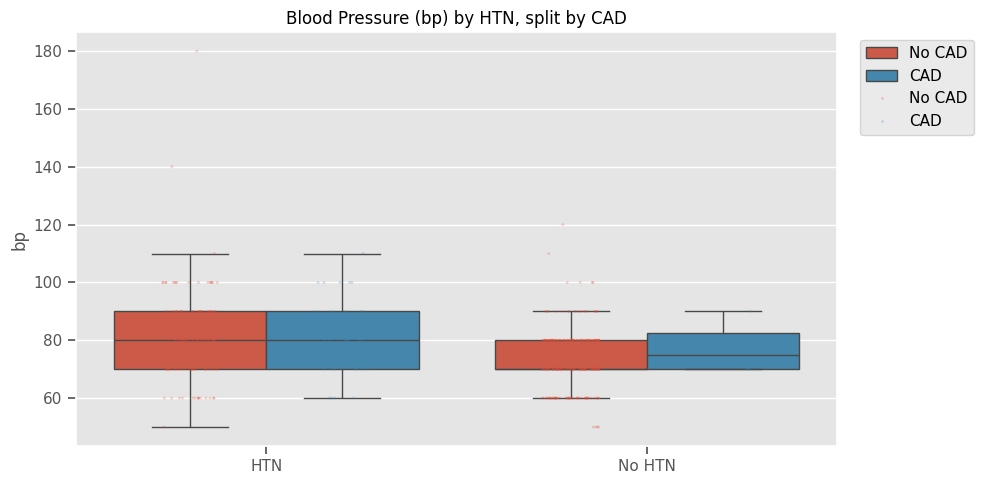

In [81]:
from scipy.stats import mannwhitneyu, chi2_contingency
from scipy.stats.contingency import association 

# Hypertension + Cardiovascular profile (bp <-> htn <-> cad) 

#We will work with a copy of the original dataset 
df_h = df.copy(deep=True)

#Ensure bp numeric
df_h["bp"] = pd.to_numeric(df_h["bp"], errors="coerce")

#Clean categorical strings
for c in ["htn", "cad", "status"]:
    if c in df_h.columns:
        df_h[c] = df_h[c].astype("string").str.strip().str.lower()

#Create nice labels
df_h["htn_lbl"] = df_h["htn"].map({"yes": "HTN", "no": "No HTN"})
df_h["cad_lbl"] = df_h["cad"].map({"yes": "CAD", "no": "No CAD"})

#Drop rows where we cannot evaluate (bp or htn missing)
df_bp_htn = df_h.dropna(subset=["bp", "htn_lbl"]).copy()

#VISUAL 1: BP distribution by HTN (violin/box)
plt.figure(figsize=(8,5))
sns.violinplot(data=df_bp_htn, x="htn_lbl", y="bp", inner=None)
sns.stripplot(data=df_bp_htn, x="htn_lbl", y="bp", alpha=0.4, jitter=0.25, size=3)
sns.boxplot(data=df_bp_htn, x="htn_lbl", y="bp", width=0.25, showcaps=True,
            boxprops={'facecolor':'none'}, showfliers=False)
plt.title("Blood Pressure (bp) by Hypertension (htn)")
plt.xlabel("")
plt.ylabel("bp")
plt.tight_layout()
plt.show()

#STAT TEST: BP differs by HTN? (Mann–Whitney U)
bp_no = df_bp_htn.loc[df_bp_htn["htn_lbl"]=="No HTN", "bp"].dropna()
bp_yes = df_bp_htn.loc[df_bp_htn["htn_lbl"]=="HTN", "bp"].dropna()
U, p = mannwhitneyu(bp_no, bp_yes, alternative="two-sided")
#Rank-biserial (direction depends on ordering)
n1, n2 = len(bp_no), len(bp_yes)
rbc = 1 - (2*U)/(n1*n2)
print(f"MWU bp by htn (No HTN vs HTN): U={U:.1f}, p={p:.3e}, rank-biserial={rbc:.3f} | n(no)={n1}, n(yes)={n2}")
print(f"median bp No HTN: {np.median(bp_no):.1f} | HTN: {np.median(bp_yes):.1f}")


#VISUAL 2: CAD prevalence within HTN groups (proportions heatmap)
df_htn_cad = df_h.dropna(subset=["htn_lbl", "cad_lbl"]).copy()
ct = pd.crosstab(df_htn_cad["htn_lbl"], df_htn_cad["cad_lbl"])
prop = ct.div(ct.sum(axis=1), axis=0)
#plot
plt.figure(figsize=(6,4))
sns.heatmap(prop, annot=True, fmt=".2f", cmap="viridis", vmin=0, vmax=1)
plt.title("Proportion of CAD within each HTN group")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()
print("\nCounts CAD vs HTN:")
print(ct)

#STAT TEST: CAD associated with HTN? (Chi-square + Cramer's V)
chi2, p_chi, dof, exp = chi2_contingency(ct)
cramers_v = association(ct, method="cramer")
print(f"\nChi-square test (htn vs cad): chi2={chi2:.3f}, dof={dof}, p={p_chi:.3e}, Cramer's V={cramers_v:.3f}")

# VISUAL 3: BP distribution split by BOTH HTN and CAD
# This visualization will help show whether higher bp often coincides with yes htn and yes cad')
df_bp_two = df_h.dropna(subset=["bp","htn_lbl","cad_lbl"]).copy()
plt.figure(figsize=(10,5))
sns.boxplot(data=df_bp_two, x="htn_lbl", y="bp", hue="cad_lbl", showfliers=False)
sns.stripplot(data=df_bp_two, x="htn_lbl", y="bp", hue="cad_lbl",
              dodge=True, alpha=0.25, size=2, jitter=0.15)
plt.title("Blood Pressure (bp) by HTN, split by CAD")
plt.xlabel("")
plt.ylabel("bp")
plt.legend(title="", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

People labeled HTN have higher blood pressure than those labeled No HTN based on the **“bp by htn” violin/strip plot**, where the HTN group is shifted upward(median 80 vs 70; p = 1.416e-06). The plot of bp by HTN split by CAD (hue) supports the interpretation that BP differences mainly track HTN, while CAD is mostly concentrated within the HTN group. 


### 6. The electrolyte profile

Electrolyte balance is tightly regulated by the kidneys and may become altered in chronic kidney disease as renal excretory and regulatory capacity declines. Disturbances in serum sodium and potassium concentrations can reflect impaired tubular handling, altered water balance, and reduced potassium excretion. However, these abnormalities are often intermittent and influenced by multiple systemic factors, including diet, hydration status, and medication use.

As a result, electrolyte levels are expected to show greater variability and lower specificity for CKD compared to direct markers of renal function.

The electrolyte profile includes the following variables:
- `sod` reflecting systemic water and sodium balance.
- `pot` a key electrolyte whose renal excretion is frequently impaired in advanced kidney disease.

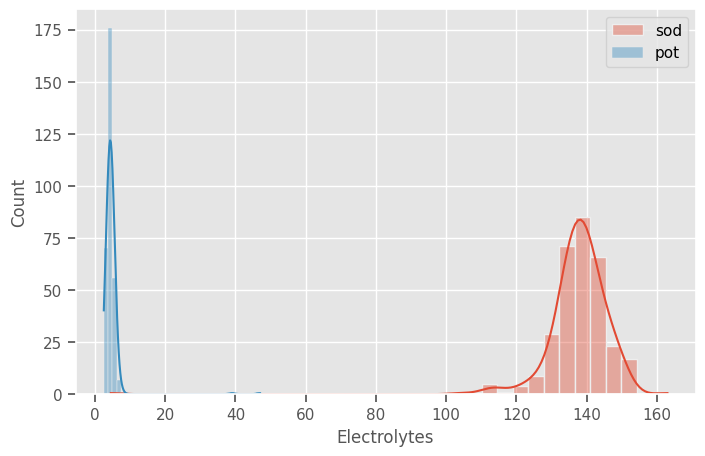

In [125]:
plt.figure(figsize=(8,5))
sns.histplot(df["sod"], kde=True, label="sod", alpha=0.4)
sns.histplot(df["pot"], kde=True, label="pot", alpha=0.4)

plt.xlabel("Electrolytes")   
plt.ylabel("Count")
plt.legend()

plt.show()

 

<Axes: xlabel='status', ylabel='sod'>

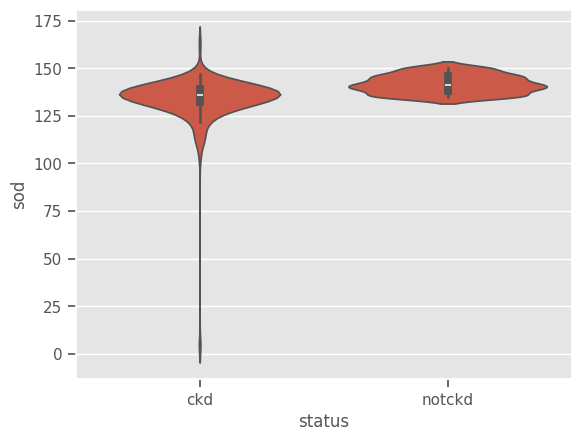

In [95]:
sns.violinplot(data=df, x="status", y="sod")


<Axes: xlabel='status', ylabel='pot'>

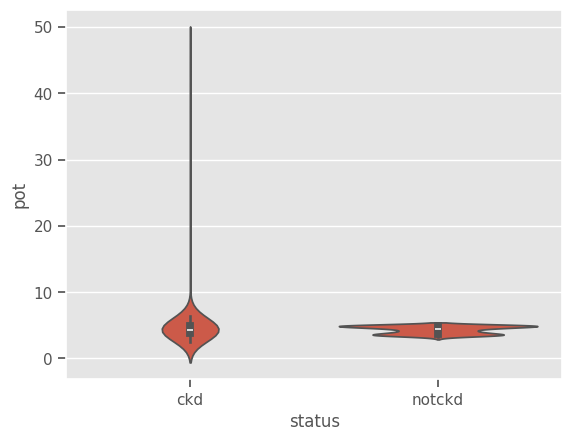

In [96]:
sns.violinplot(data=df, x="status", y="pot")

In [102]:
df.groupby("status")["pot"].describe()


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
ckd,167.0,4.878443,4.321550,2.5,3.85,4.3,4.9,47.0
notckd,145.0,4.337931,0.587257,3.3,3.70,4.5,4.9,5.0


In [99]:
df.groupby("status")["sod"].describe()


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
ckd,168.0,133.901786,12.402827,4.5,132.0,136.0,139.0,163.0
notckd,145.0,141.731034,4.817871,135.0,138.0,141.0,146.0,150.0


In [105]:
#Numeric columns for this profile
electrolytes_cols = ["sod", "pot"]
for c in electrolytes_cols:
    d[c] = pd.to_numeric(d[c], errors="coerce")
    
#MWU tests + rank-biserial effect size
def rank_biserial_from_u(U, n1, n2):
    # RBC = 1 - 2U/(n1*n2) when U is for group1 vs group2
    return 1 - (2 * U) / (n1 * n2)

print("\nMWU tests (Not CKD vs CKD) + rank-biserial:")
for c in electrolytes_cols:
    a = dk.loc[dk["status_lbl"]=="Not CKD", c].dropna()
    b = dk.loc[dk["status_lbl"]=="CKD", c].dropna()
    if len(a) < 5 or len(b) < 5:
        print(f" {c}: not enough data")
        continue

    U, p = mannwhitneyu(a, b, alternative="two-sided")
    rbc = rank_biserial_from_u(U, len(a), len(b))
    print(f" {c}: U={U:.1f}, p={p:.3e}, rank-biserial={rbc:.3f} | median NotCKD={np.median(a):g} vs CKD={np.median(b):g}")



MWU tests (Not CKD vs CKD) + rank-biserial:
 sod: U=19583.0, p=1.499e-20, rank-biserial=-0.608 | median NotCKD=141 vs CKD=136
 pot: U=11893.5, p=7.878e-01, rank-biserial=0.018 | median NotCKD=4.5 vs CKD=4.3


Sodium (`sod`) is lower in CKD (median 136 vs 141, p ≈ 2.5e−26). Potassium (`pot`) does not separate CKD from non-CKD here (p = 0.415) and has an extreme outlier, so it’s not a reliable marker in this dataset as-is.


Potassium levels exhibited greater variability in CKD patients, with occasional elevated values consistent with reduced renal potassium excretion. Nevertheless, the presence of extreme values far outside physiological ranges for both sodium and potassium suggests data quality issues, such as entry or unit inconsistencies, rather than true clinical observations. 

**!!!!!  recall the outliers**

### Overall EDA conclusions

The **anemia profile** showed strong internal coherence between `hem`, `pcv` and `rbcc`, with good alignment between quantitative markers and the clinical anemia label. These findings support treating anemia related variables as a unified clinical block during data preparation.

The **diabetes and glucose profile** exhibited heterogeneous patterns. Although `bgr` and `gc` were more frequent among individuals with diabetes, substantial overlap between groups was observed, reflecting random  measurements and treatment effects. This heterogeneity suggests that glucose-related variables provide complementary but non-deterministic information.

The **urinalysis profile** revealed clinically driven missingness and heterogeneous co-occurrence of abnormalities. `al` and `rbc` were strongly associated with CKD status, while other urine findings appeared in subsets of patients, highlighting the multifactorial nature of renal pathology and the need for cautious handling of missing values. It also reveals tightly coupled urine findings (`rbc`, `pc`, `pcc`, `ba`) and their association with higher `al` and lower `sg`, enabling joint imputation within this block. 

The **renal function profile** demonstrated marked separation between CKD and non-CKD individuals, particularly for `sc` and `bu`. Given their central role in the clinical definition of CKD, these variables were identified as high-risk sources of data leakage and require special consideration in both imputation and modeling.

The **electrolyte profile** indicated that `pot` levels exhibited greater variability in CKD patients, with occasional elevated values consistent with reduced renal potassium excretion. Similarly, with `sod` we observe that it is lower in CKD so it shows a negative association. 



We will impute by profile using multivariate methods (KNN/Iterative) wherever the relationships are strong.

## Fill Missing Values

Based on the exploratory analysis, missing values were handled using clinically informed, profile-based strategies rather than a global imputation approach. Encoding and imputation decisions were guided by the physiological relationships observed within each clinical profile, with particular care taken to preserve biologically plausible value combinations and to avoid information leakage.


### Encoding

Categorical variables were encoded prior to normalization using encoding strategies aligned with their clinical interpretation. Binary encoding was applied to variables representing two clinically distinct states (e.g., yes/no, normal/abnormal, present/not present), mapping the normal or baseline state to 0 and the abnormal or pathological state to 1. Ordinal encoding was applied to variables representing ordered clinical scales, preserving the intrinsic ordering of severity. Specifically, urine specific gravity (sg) and semi-quantitative measures of albuminuria (al) and glucosuria (su) were encoded according to their established clinical levels.

In particular:
- `sg`: 1.005 < 1.010 < 1.015 < 1.020 < 1.025
- `al`: 0 < 1 < 2 < 3 < 4 < 5
- `su`: 0 < 1 < 2 < 3 < 4 < 5

Variables with very low proportions of missing values (pcc, ba, htn, dm, cad, appet, pe, ane) were imputed using mode substitution, as missingness in these variables was minimal and unlikely to reflect structured clinical patterns.

For variables with clinically meaningful interdependencies, missing values were imputed using profile-based multivariate imputation. Urinalysis variables (rbc, pc, pcc, ba, al, sg) were imputed jointly using an iterative imputation approach with a random forest estimator, preserving the strong internal coupling observed during exploratory analysis. This strategy allows missing values to be filled in a manner consistent with co-occurring urinary abnormalities and underlying renal pathology.

Similarly, the glucose/diabetes profile was imputed jointly by modeling glucosuria (su) as a function of random blood glucose (bgr) and diabetes status (dm), reflecting their complementary but non-deterministic clinical relationship.

In [40]:
df_enc = df.copy(deep=True)


In [132]:
#Let's define the nominal Columns
binary_cols = ["rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane"]
ordinal_cols = ["sg","al","su"] # since we have levels

#Clean whitespace/casing for string categoricals
for c in binary_cols:
    df[c] = df[c].astype("string").str.strip().str.lower()

#Binary mappings
binary_maps = {
    "rbc": {"normal": 0, "abnormal": 1},
    "pc": {"normal": 0, "abnormal": 1},
    "pcc": {"notpresent": 0, "present": 1},
    "ba": {"notpresent": 0, "present": 1},
    "htn": {"no": 0, "yes": 1},
    "dm": {"no": 0, "yes": 1},
    "cad": {"no": 0, "yes": 1},
    "appet": {"good": 0, "poor": 1},
    "pe": {"no": 0, "yes": 1},
    "ane": {"no": 0, "yes": 1},
}

for c in binary_cols:
    df[c] = df[c].map(binary_maps[c])

#Ordinal encoding for sg, al, su
#Convert to numeric safely (will make invalid strings -> NaN)
df["sg"] = pd.to_numeric(df["sg"], errors="coerce")
df["al"] = pd.to_numeric(df["al"], errors="coerce")
df["su"] = pd.to_numeric(df["su"], errors="coerce")

# Explicit order for sg (5 levels)
sg_order = [1.005, 1.010, 1.015, 1.020, 1.025]
sg_map = {v: i for i, v in enumerate(sg_order)}  # 1.005->0 ... 1.025->4
df["sg"] = df["sg"].map(sg_map)

# al and su are already ordered 0..5
df.loc[~df["al"].between(0, 5), "al"] = np.nan
df.loc[~df["su"].between(0, 5), "su"] = np.nan

Create df_encoded (encoded + low-missing mode fill)

In [134]:
#df_encoded = encoded version of df 
df_encoded = df.copy(deep=True)

# MODE fill for low-missing binary columns
low_missing_cols = ["pcc","ba","htn","dm","cad","appet","pe","ane"]
for c in low_missing_cols:
    mode_val = df_encoded[c].mode(dropna=True).iloc[0]
    df_encoded[c] = df_encoded[c].fillna(mode_val)

print("Missing values in the encoded dataframe: ")
df_encoded.isna().sum()

Missing values in the encoded dataframe: 


age         9
bp         12
sg         47
al         46
su         49
rbc       152
pc         65
pcc         0
ba          0
bgr        44
bu         19
sc         17
sod        87
pot        88
hemo       52
pcv        71
wbcc      106
rbcc      131
htn         0
dm          0
cad         0
appet       0
pe          0
ane         0
status      0
dtype: int64

Now we don't have missing values for columns like "pcc","ba","htn","dm","cad","appet","pe","ane". 

In [135]:
# Build df_imputed and ensure no “shape mismatch” happens
df_imputed = df_encoded.copy(deep=True)

### **IMPUTE THE URINALYSIS PROFILE**

Impute the urinalysis profile together (rbc, pc, sg, al):

We found from the EDA that rbc and pc co-occur with pcc/ba, and that al and sg shift systematically with abnormal findings. That’s exactly our multivariate imputation preserves, it fills missing values in a way that stays consistent with the rest of the urinalysis pattern. We use IterativeImputer with a RandomForestRegressor to model non-linear relationships and then constrain outputs back to valid clinical ranges.

In [137]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Work on numeric matrix for the imputer
# (Everything here is already encoded to numbers, but we force numeric anyway)
for c in ["rbc","pc","pcc","ba","al","sg"]:
    df_imputed[c] = pd.to_numeric(df_imputed[c], errors="coerce")

urine_cols = ["rbc","pc","pcc","ba","al","sg"]

imp_urine = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=400, min_samples_leaf=5, random_state=42, n_jobs=-1
    ),
    max_iter=25,
    random_state=42,
    initial_strategy="most_frequent"  # good for mostly-categorical blocks
)

df_imputed[urine_cols] = imp_urine.fit_transform(df_imputed[urine_cols])


This post-processing step enforces biological plausibility without using the outcome label.

In [138]:

# Snap back to valid categories
# rbc/pc/pcc/ba are binary 0/1
for c in ["rbc","pc","pcc","ba"]:
    df_imputed[c] = df_imputed[c].clip(0, 1).round().astype("Int64")

# al: 0..5, sg: 0..4 (our encoding)
df_imputed["al"] = df_imputed["al"].clip(0, 5).round().astype("Int64")
df_imputed["sg"] = df_imputed["sg"].clip(0, 4).round().astype("Int64")

### **IMPUTE THE GLUCOSE/DIABETES PROFILE**

We impute the glucose/diabetes block together so su is filled consistently with bgr and dm (non-linear, heterogeneous patterns). We use IterativeImputer + RandomForest and then clip/round to keep valid encoded categories.

In [ ]:
# Force numeric
df_imputed["bgr"] = pd.to_numeric(df_imputed["bgr"], errors="coerce")
df_imputed["dm"]  = pd.to_numeric(df_imputed["dm"],  errors="coerce")
df_imputed["su"]  = pd.to_numeric(df_imputed["su"],  errors="coerce")

glucose_cols = ["bgr", "dm", "su"]

imp_glucose = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=300, min_samples_leaf=4, random_state=42, n_jobs=-1
    ),
    max_iter=20,
    random_state=42,
    initial_strategy="median"
)

df_imputed[glucose_cols] = imp_glucose.fit_transform(df_imputed[glucose_cols])

# Snap back to valid categories
df_imputed["dm"] = df_imputed["dm"].clip(0, 1).round().astype("Int64")
df_imputed["su"] = df_imputed["su"].clip(0, 5).round().astype("Int64")


In [ ]:
# Verification: Now we should have 0 missing in the categorical columns

print("Verifying Missing Values for all the categorical columns:")
print(df_imputed[["rbc","pc","su","sg","al","pcc","ba","htn","dm","cad","appet","pe","ane"]].isna().sum())
# We should get 0 for all these columns


Verifying Missing Values for all the categorical columns:
rbc      0
pc       0
su       0
sg       0
al       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


In [ ]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

#Make sure these columns are numeric
cols_needed = [
    "hemo","pcv","rbcc","wbcc",
    "bp","htn","cad",
    "bu","sc",
    "sod","pot",
    "age"
]

for c in cols_needed:
    if c in df_imputed.columns:
        df_imputed[c] = pd.to_numeric(df_imputed[c], errors="coerce")


In [ ]:
blood_cols = [c for c in ["hemo","pcv","rbcc","wbcc"] if c in df_imputed.columns]

imp_blood = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=400,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ),
    max_iter=40,
    random_state=42,
    initial_strategy="median"
)

df_imputed.loc[:, blood_cols] = imp_blood.fit_transform(df_imputed[blood_cols])


In [152]:
# Hypertension/Cardiovascular profile (bp, htn)
bp_cols = [c for c in ["bp","htn"] if c in df_imputed.columns]

imp_bp = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=300,
        min_samples_leaf=4,
        random_state=42,
        n_jobs=-1
    ),
    max_iter=30,
    random_state=42,
    initial_strategy="median"
)

df_imputed.loc[:, bp_cols] = imp_bp.fit_transform(df_imputed[bp_cols])

# Snap back HTN
if "htn" in df_imputed.columns:
    df_imputed["htn"] = df_imputed["htn"].clip(0, 1).round().astype("Int64")


In [154]:
# Sodium (mmol/L)
if "sod" in df_imputed.columns:
    df_imputed["sod"] = df_imputed["sod"].clip(120, 155)

# Potassium (mmol/L)
if "pot" in df_imputed.columns:
    df_imputed["pot"] = df_imputed["pot"].clip(2.5, 6.5)

for c in ["sod", "pot"]:
    if c in df_imputed.columns:
        df_imputed[c] = df_imputed[c].fillna(df_imputed[c].median())

# sc and bu are left as-is (or handled later by model choice)
# Optional: simple median if you REALLY want completeness

for c in ["sc","bu"]:
    if c in df_imputed.columns:
        df_imputed[c] = df_imputed[c].fillna(df_imputed[c].median())




In [155]:
if "age" in df_imputed.columns:
    df_imputed["age"] = df_imputed["age"].fillna(df_imputed["age"].median())


In [158]:
check_cols = [
    "hemo","pcv","rbcc","wbcc",
    "bp","htn",
    "sod","pot",
    "sc","bu",
    "age"
]

check_cols = [c for c in check_cols if c in df_imputed.columns]

print("Missing AFTER (numeric):")
print(df_imputed[check_cols].isna().sum().sort_values(ascending=False))


Missing AFTER (numeric):
hemo    0
pcv     0
rbcc    0
wbcc    0
bp      0
htn     0
sod     0
pot     0
sc      0
bu      0
age     0
dtype: int64


In [159]:
#Let's check for missing values for our whole dataset --> Everything should be 0

df_imputed.isna().sum()

age       0
bp        0
sg        0
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
status    0
dtype: int64

## NORMALITZATION

In [160]:
# Quick check
print(df_imputed[binary_cols + ordinal_cols].head(10))

   rbc  pc  pcc  ba  htn  dm  cad  appet   pe  ane  sg  al  su
0    1   0    0   0    1   1  0.0    0.0  0.0  0.0   3   1   0
1    0   0    0   0    0   0  0.0    0.0  0.0  0.0   3   4   0
2    0   0    0   0    0   1  0.0    1.0  0.0  1.0   1   2   3
3    0   1    1   0    1   0  0.0    1.0  1.0  1.0   0   4   0
4    0   0    0   0    0   0  0.0    0.0  0.0  0.0   1   2   0
5    0   0    0   0    1   1  0.0    0.0  1.0  0.0   2   3   0
6    0   0    0   0    0   0  0.0    0.0  0.0  0.0   1   0   0
7    0   1    0   0    0   1  0.0    0.0  1.0  0.0   2   2   4
8    0   1    1   0    1   1  0.0    0.0  0.0  1.0   2   3   0
9    1   1    1   0    1   1  0.0    1.0  0.0  1.0   3   2   0


**Numeric columns and normalization strategy**

The dataset contains multiple true continuous numeric variables, including `age`, blood pressure (`bp`), random blood glucose (`bgr`), blood urea (bu), serum creatinine (`sc`), sodium (`sod`), potassium (`pot`), hemoglobin (`hemo`), packed cell volume (`pcv`), white blood cell count (`wbcc`), and red blood cell count (`rbcc`). These variables exhibit heterogeneous distributions and varying degrees of skewness and outliers, as identified during exploratory analysis.

To ensure comparability across features in distance-based unsupervised analyses, a two-step normalization strategy was applied. First, continuous variables were transformed using the **Yeo–Johnson power transformation**, which reduces both right- and left-skewed distributions while supporting zero and negative values. This approach was selected over simple log transforms to provide a unified treatment across all numeric variables.

In [ ]:
# Yeo–Johnson

from sklearn.preprocessing import PowerTransformer

cont_cols = [
    "age","bp","bgr","bu","sc",
    "sod","pot","hemo","pcv","wbcc","rbcc"
]
cont_cols = [c for c in cont_cols if c in df_imputed.columns]

pt = PowerTransformer(method="yeo-johnson")
df_transformed = df_imputed.copy()
df_transformed[cont_cols] = pt.fit_transform(df_imputed[cont_cols])


Second, transformed features were standardized using **z-score normalization** (mean 0, standard deviation 1). Standardization places all variables on a common scale, preventing features with larger numeric ranges from dominating Euclidean distances in clustering algorithms such as k-means and hierarchical clustering.

In [ ]:
# Z-score (StandardScaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_transformed.copy()
df_scaled[cont_cols] = scaler.fit_transform(df_transformed[cont_cols])


Ordinal urinalysis measures (specific gravity, albuminuria, and glucosuria) were not power-transformed but were also standardized using **z-scores** to ensure comparable weighting relative to continuous laboratory measurements. Binary variables were left unchanged.

In [ ]:
# Z-score for the ordinals

ordinal_cols = ["sg","al","su"]
ordinal_cols = [c for c in ordinal_cols if c in df_scaled.columns]

df_scaled[ordinal_cols] = StandardScaler().fit_transform(df_scaled[ordinal_cols])



Post-normalization distributions were visually inspected as a quality-control step to confirm appropriate centering and scale comparability prior to feature engineering and unsupervised learning.

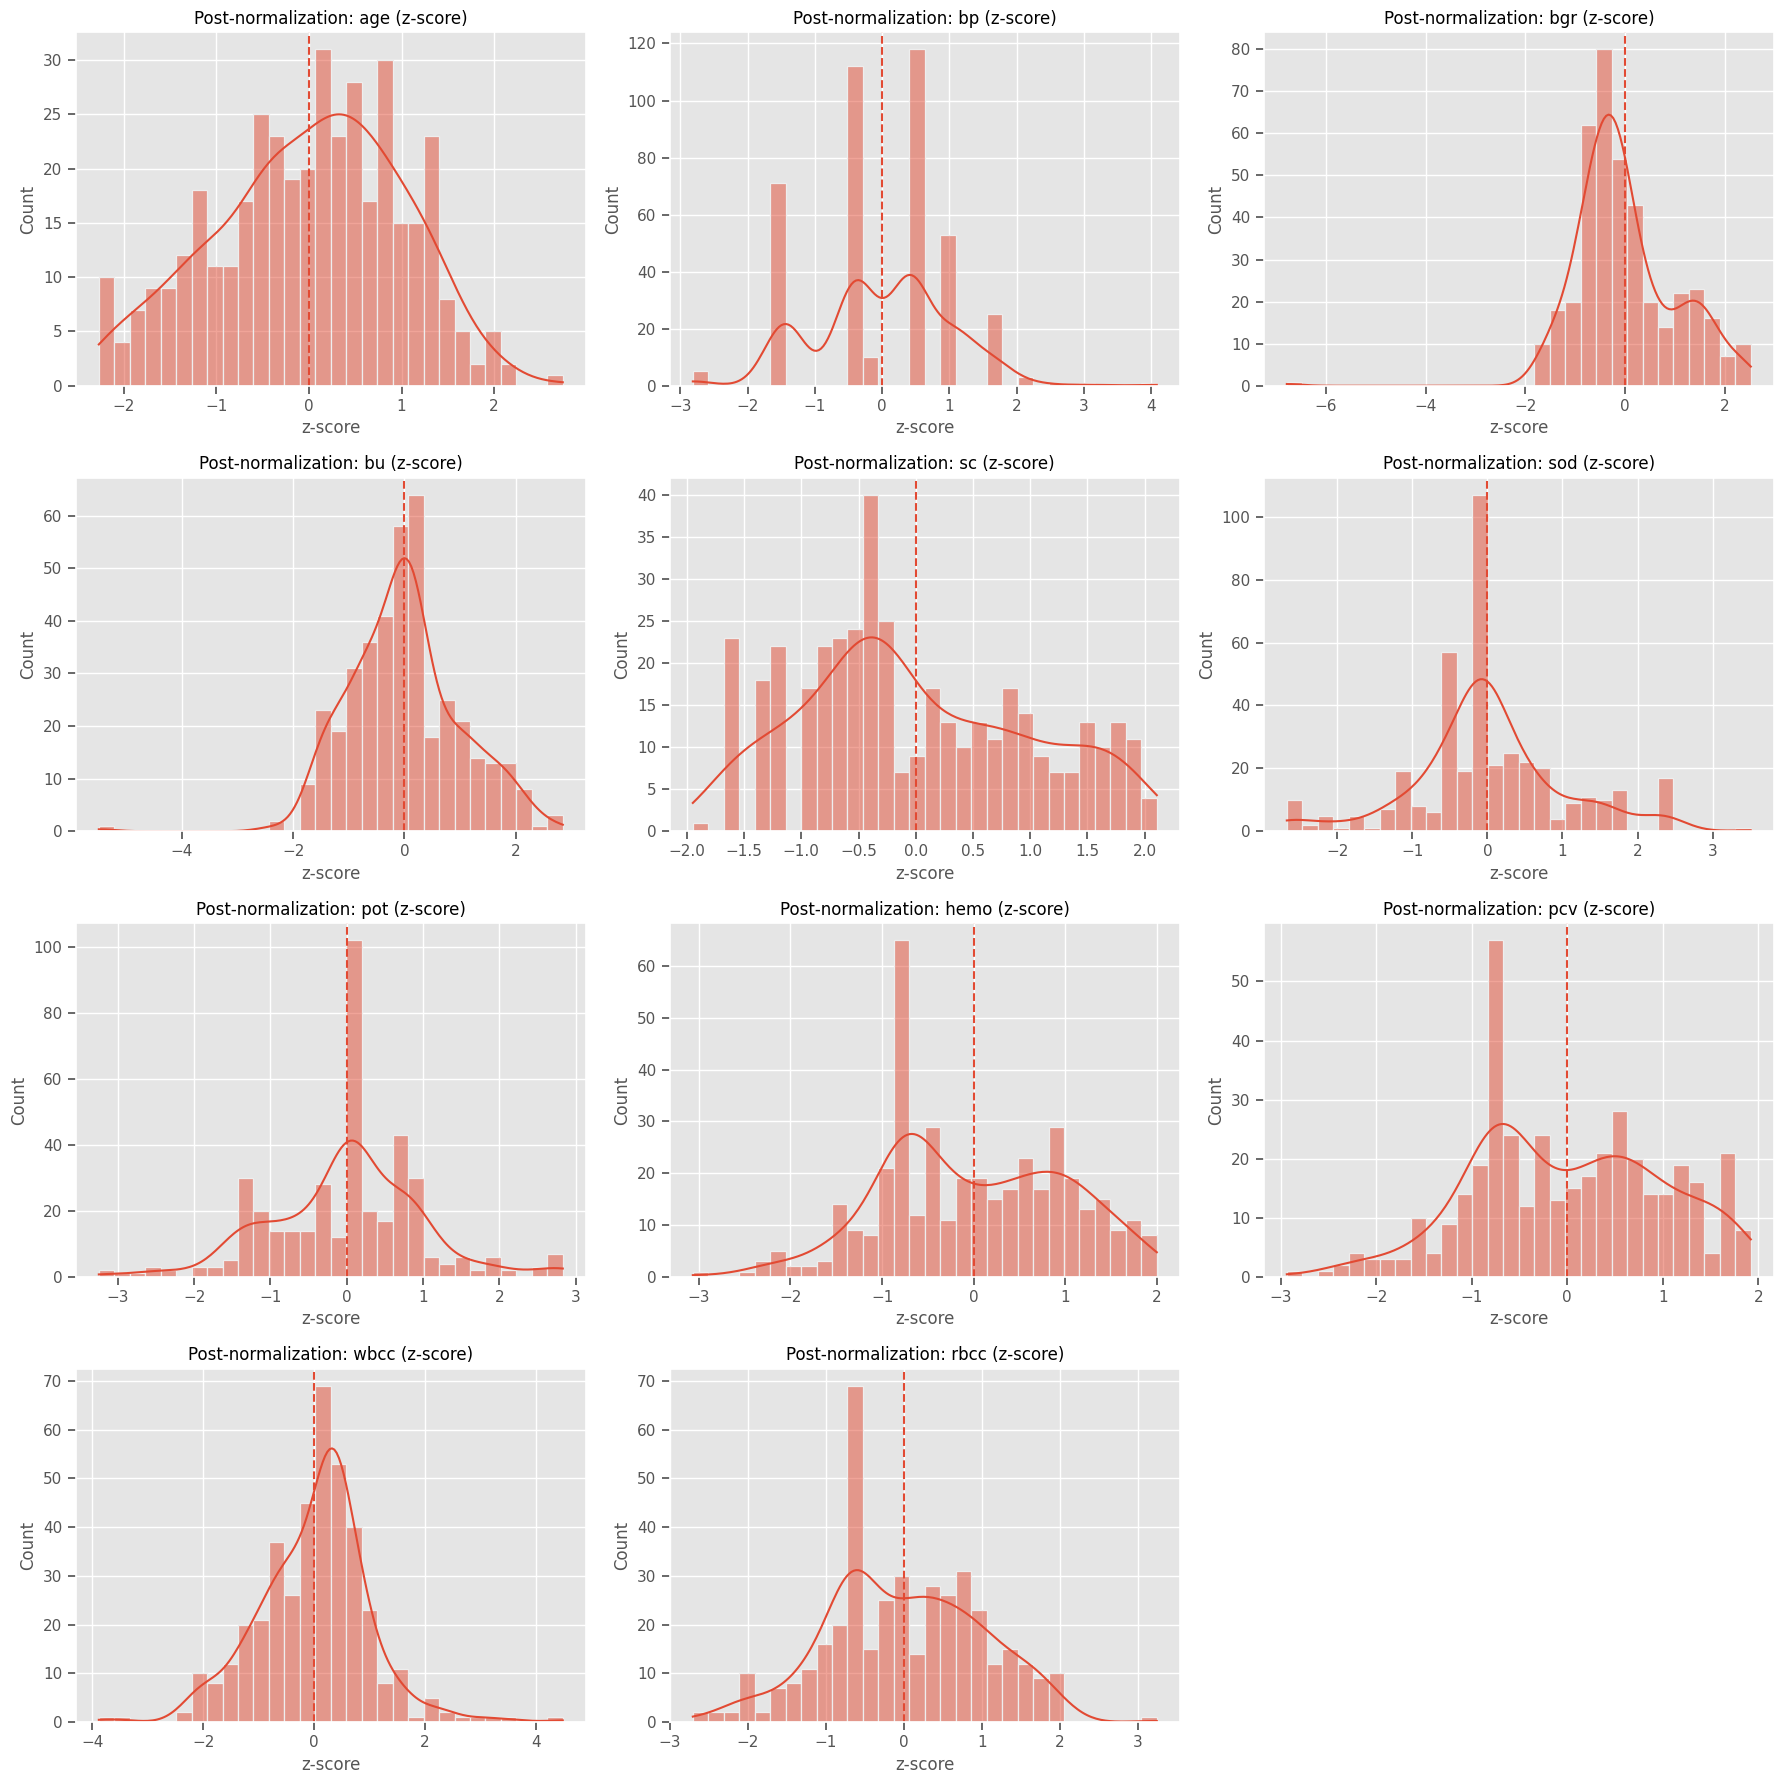

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# cont_cols = ["age","bp","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]
cont_cols = [c for c in cont_cols if c in df_scaled.columns]

n_cols = 3
n_rows = (len(cont_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4.5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    sns.histplot(df_scaled[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].axvline(0, linestyle="--")  # 0 = mean after z-score (approximately)
    axes[i].set_title(f"Post-normalization: {col} (z-score)")
    axes[i].set_xlabel("z-score")
    axes[i].set_ylabel("Count")

# remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



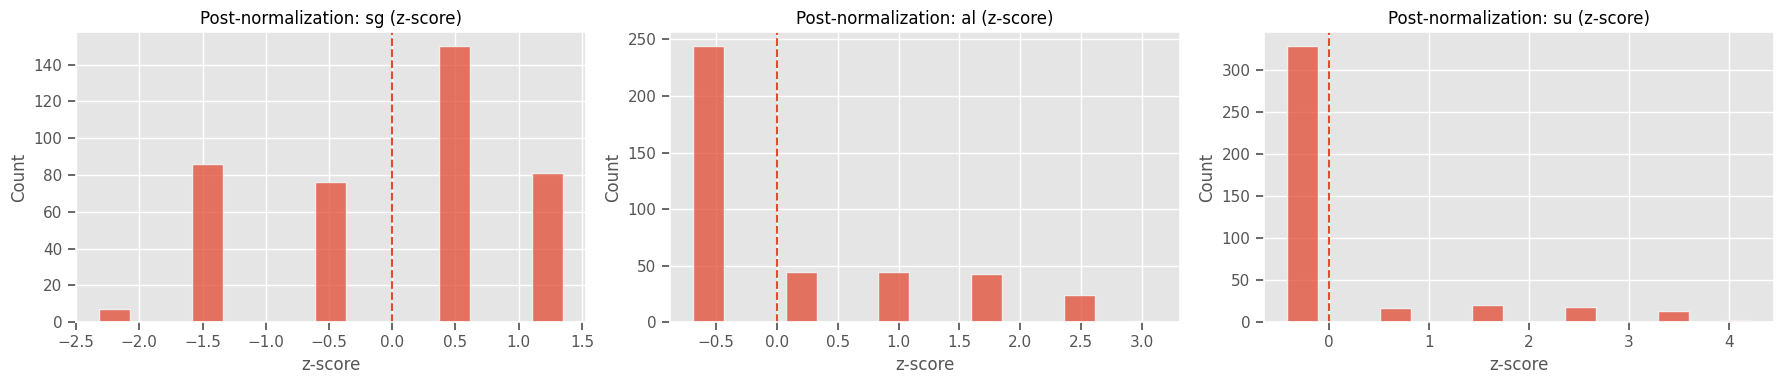

In [170]:
ordinal_cols = [c for c in ["sg","al","su"] if c in df_scaled.columns]

fig, axes = plt.subplots(1, len(ordinal_cols), figsize=(6 * len(ordinal_cols), 4))
if len(ordinal_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, ordinal_cols):
    sns.histplot(df_scaled[col].dropna(), bins=15, kde=False, ax=ax)
    ax.axvline(0, linestyle="--")
    ax.set_title(f"Post-normalization: {col} (z-score)")
    ax.set_xlabel("z-score")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


### Feature engineering

In [180]:
#Start from the fully scaled dataset
df_norm = df_scaled.copy(deep=True)

import numpy as np
import pandas as pd

# 1) Choose the dataset for clustering
work = df_norm.copy()

# 2) Separate label for visualization only
y_status = work["status"].astype("string").str.strip().str.lower()

# 3) Features only (DO NOT include status)
X = work.drop(columns=["status"]).copy()

# 4) Safety checks
print("Any missing in X?", X.isna().sum().sum())
print("X shape:", X.shape)
print("Status counts:\n", y_status.value_counts(dropna=False))

Any missing in X? 0
X shape: (400, 24)
Status counts:
 status
ckd       250
notckd    150
Name: count, dtype: Int64


Explained variance ratio: [0.364042   0.10349353]
Total explained (PC1+PC2): 0.46753553415829585


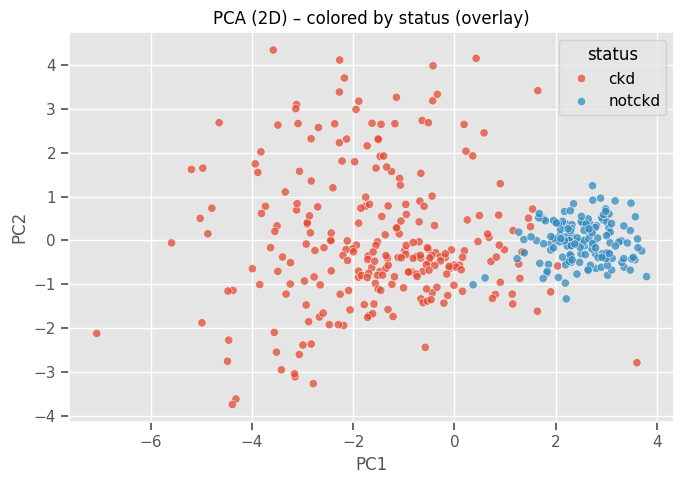

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Z = pca.fit_transform(X)

pca_df = pd.DataFrame(Z, columns=["PC1", "PC2"], index=X.index)
pca_df["status"] = y_status.loc[X.index].values  # alignement

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained (PC1+PC2):", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="status", alpha=0.75)
plt.title("PCA (2D) – colored by status")
plt.tight_layout()
plt.show()


k-mean

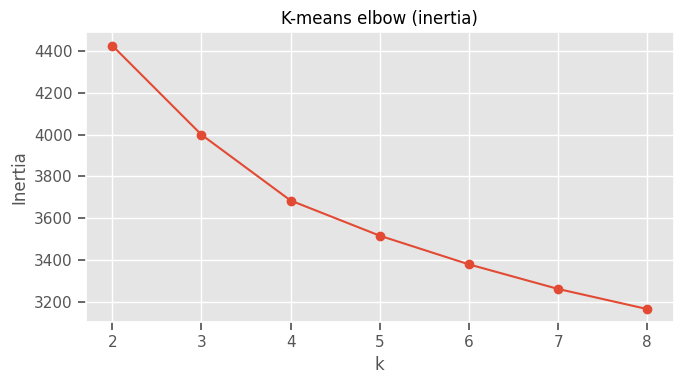

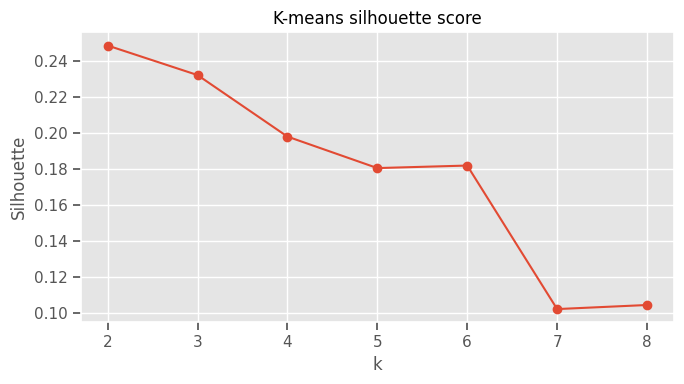

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# X = X_cluster  # feature matrix
ks = range(2, 9)
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X)

    inertias.append(km.inertia_)

    silhouettes.append(silhouette_score(X, labels))

# Elbow
plt.figure(figsize=(7,4))
plt.plot(list(ks), inertias, marker="o")
plt.title("K-means elbow (inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

# Silhouette
plt.figure(figsize=(7,4))
plt.plot(list(ks), silhouettes, marker="o")
plt.title("K-means silhouette score")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.tight_layout()
plt.show()


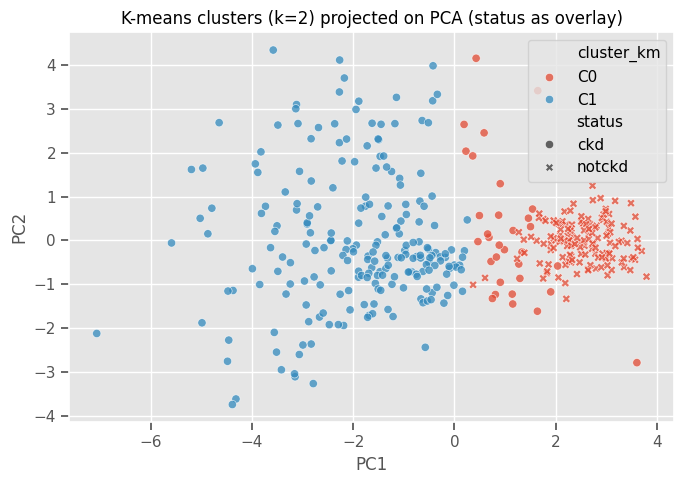

Counts (cluster × status):
status      ckd  notckd
cluster_km             
C0           32     150
C1          218       0

Row proportions (P(status | cluster)):
status        ckd  notckd
cluster_km               
C0          0.176   0.824
C1          1.000   0.000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# X = X_cluster  # feature matrix
# Choose k based on previous analysis

k = 2
km = KMeans(n_clusters=k, random_state=42, n_init=20)

# Alignement
if hasattr(X, "index"):
    idx = X.index
else:
    idx = pca_df.index  

cluster_km = km.fit_predict(X)

# Add cluster labels to pca_df
pca_df = pca_df.copy()
pca_df.loc[idx, "cluster_km"] = cluster_km
pca_df["cluster_km"] = pca_df["cluster_km"].astype(int).map({0: "C0", 1: "C1"})

# Scatter PCA amb clústers + status overlay
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="cluster_km",
    style="status",
    alpha=0.75
)
plt.title(f"K-means clusters (k={k}) projected on PCA (status as overlay)")
plt.tight_layout()
plt.show()

# Contingency table: cluster vs status
ct_counts = pd.crosstab(pca_df["cluster_km"], pca_df["status"])
ct_props  = pd.crosstab(pca_df["cluster_km"], pca_df["status"], normalize="index")

print("Counts (cluster × status):")
print(ct_counts)

print("\nRow proportions (P(status | cluster)):")
print(ct_props.round(3))


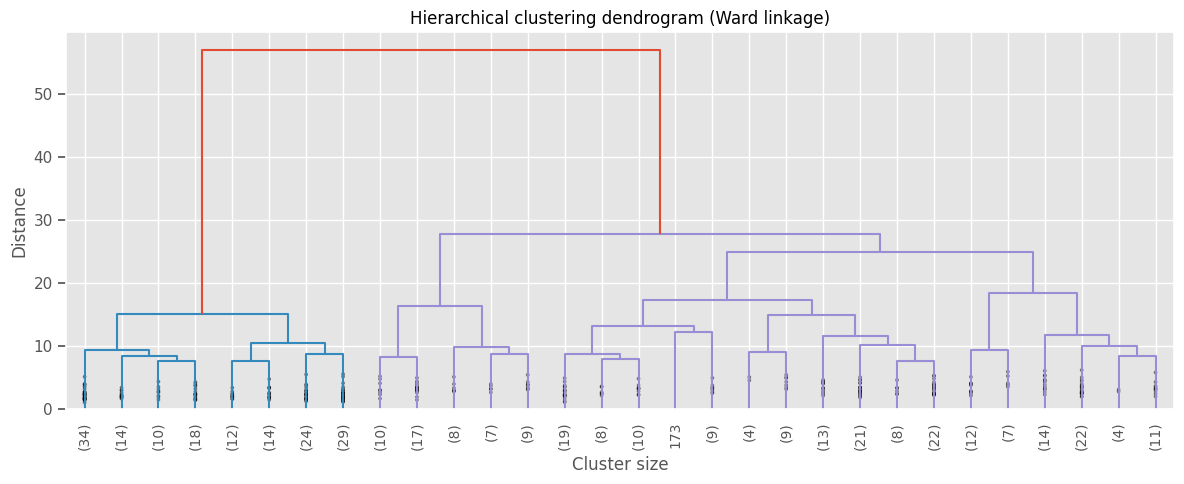

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Ward linkage 
Z = linkage(X, method="ward")

plt.figure(figsize=(12,5))
dendrogram(
    Z,
    truncate_mode="lastp",  
    p=30,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.title("Hierarchical clustering dendrogram (Ward linkage)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()
from scipy.cluster.hierarchy import fcluster

In [ ]:
from scipy.cluster.hierarchy import fcluster

k = 2
cluster_h = fcluster(Z, k, criterion="maxclust")

# Add hierarchical cluster labels to pca_df
pca_df = pca_df.copy()
pca_df["cluster_h"] = pd.Series(cluster_h, index=pca_df.index)
pca_df["cluster_h"] = pca_df["cluster_h"].map({1: "H0", 2: "H1"})


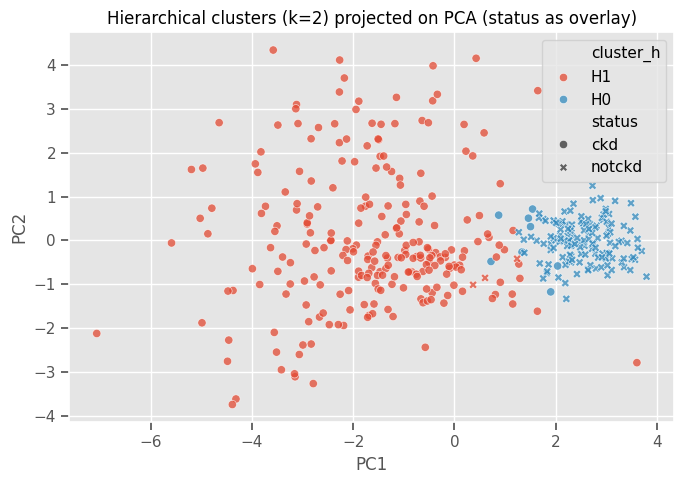

In [190]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="cluster_h",
    style="status",
    alpha=0.75
)
plt.title("Hierarchical clusters (k=2) projected on PCA (status as overlay)")
plt.tight_layout()
plt.show()


In [191]:
ct_h_counts = pd.crosstab(pca_df["cluster_h"], pca_df["status"])
ct_h_props  = pd.crosstab(
    pca_df["cluster_h"],
    pca_df["status"],
    normalize="index"
)

print("Counts (hierarchical cluster × status):")
print(ct_h_counts)

print("\nRow proportions (P(status | hierarchical cluster)):")
print(ct_h_props.round(3))


Counts (hierarchical cluster × status):
status     ckd  notckd
cluster_h             
H0           8     147
H1         242       3

Row proportions (P(status | hierarchical cluster)):
status       ckd  notckd
cluster_h               
H0         0.052   0.948
H1         0.988   0.012


In [205]:
# Normalitzar status (strings)
df_imputed["status"] = (
    df_imputed["status"]
    .astype("string")
    .str.strip()
    .str.lower()
)

# Mapping explícit
status_map = {
    "ckd": 1,
    "notckd": 0,
    "not ckd": 0
}

df_imputed["status_num"] = df_imputed["status"].map(status_map)

df_imputed[["status", "status_num"]].drop_duplicates()

df_imputed["status_num"].isna().sum()


np.int64(0)

In [ ]:
df_final = df_norm.copy()
df_final["status"] = df_imputed["status_num"].astype(int)

# Numerical columns (normalized)
numerical_cols = [
    "age","bp","bgr","bu","sc","sod","pot",
    "hemo","pcv","wbcc","rbcc"
]

# Categorical columns (encoded)
categorical_cols = [
    "rbc","pc","pcc","ba",
    "htn","dm","cad","appet","pe","ane",
    "sg","al","su"
]

features = numerical_cols + categorical_cols

from scipy.stats import f_oneway

f_scores, p_values = [], []

for feature in features:
    ckd_vals = df_final.loc[df_final["status"] == 1, feature].dropna()
    no_ckd_vals = df_final.loc[df_final["status"] == 0, feature].dropna()

    f_stat, p_val = f_oneway(ckd_vals, no_ckd_vals)
    f_scores.append(f_stat)
    p_values.append(p_val)

f_score_df = (
    pd.DataFrame({
        "Variable": features,
        "F_Score": f_scores,
        "P_Value": p_values
    })
    .sort_values("F_Score", ascending=False)
)

print("Top 10 variables per F-score (ANOVA):")
print(f_score_df.head(10).to_string(index=False))

Top 10 variables per F-score (ANOVA):
Variable    F_Score      P_Value
    hemo 582.860460 5.766360e-80
     pcv 497.776070 4.144614e-72
    rbcc 365.721486 2.710871e-58
      sc 328.523795 5.764667e-54
      sg 316.149028 1.778559e-52
     htn 213.007282 6.054058e-39
      dm 180.949115 2.905389e-34
      al 159.067610 6.490393e-31
     sod 126.469924 1.147028e-25
   appet  72.848214 2.982914e-16


In [212]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(
    df_final[features],
    df_final["status"],
    random_state=42
)

mi_df = (
    pd.DataFrame({
        "Variable": features,
        "MI_Score": mi_scores
    })
    .sort_values("MI_Score", ascending=False)
)

print("Top 10 variables per Mutual Information:")
print(mi_df.head(10).to_string(index=False))


Top 10 variables per Mutual Information:
Variable  MI_Score
    hemo  0.442834
     pcv  0.414392
    rbcc  0.375134
      sc  0.375125
      sg  0.317240
      al  0.252864
     htn  0.249246
     sod  0.230294
      dm  0.212642
      bp  0.180521


In [210]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(df_final[features], df_final["status"])

rf_df = (
    pd.DataFrame({
        "Variable": features,
        "RF_Importance": rf.feature_importances_
    })
    .sort_values("RF_Importance", ascending=False)
)

print("Top 10 variables per Random Forest importance:")
print(rf_df.head(10).to_string(index=False))


Top 10 variables per Random Forest importance:
Variable  RF_Importance
    hemo       0.204550
     pcv       0.157832
      sg       0.123249
      sc       0.118720
    rbcc       0.117751
      al       0.056569
     htn       0.043166
      dm       0.039019
     bgr       0.034332
      bu       0.021926


In [213]:
f_score_df["F_Rank"] = f_score_df["F_Score"].rank(ascending=False)
mi_df["MI_Rank"] = mi_df["MI_Score"].rank(ascending=False)
rf_df["RF_Rank"] = rf_df["RF_Importance"].rank(ascending=False)

consensus = (
    f_score_df[["Variable","F_Rank"]]
    .merge(mi_df[["Variable","MI_Rank"]], on="Variable")
    .merge(rf_df[["Variable","RF_Rank"]], on="Variable")
)

consensus["Avg_Rank"] = consensus[["F_Rank","MI_Rank","RF_Rank"]].mean(axis=1)
consensus = consensus.sort_values("Avg_Rank")

print("Top 15 variables per consens:")
print(consensus.head(15).to_string(index=False))


Top 15 variables per consens:
Variable  F_Rank  MI_Rank  RF_Rank  Avg_Rank
    hemo     1.0      1.0      1.0  1.000000
     pcv     2.0      2.0      2.0  2.000000
    rbcc     3.0      3.0      5.0  3.666667
      sc     4.0      4.0      4.0  4.000000
      sg     5.0      5.0      3.0  4.333333
     htn     6.0      7.0      7.0  6.666667
      al     8.0      6.0      6.0  6.666667
      dm     7.0      9.0      8.0  8.000000
     sod     9.0      8.0     11.0  9.333333
     bgr    12.0     12.0      9.0 11.000000
      bu    11.0     13.0     10.0 11.333333
   appet    10.0     16.0     13.0 13.000000
      bp    18.0     10.0     12.0 13.333333
      pc    13.0     14.0     18.0 15.000000
      su    16.0     17.0     14.0 15.666667


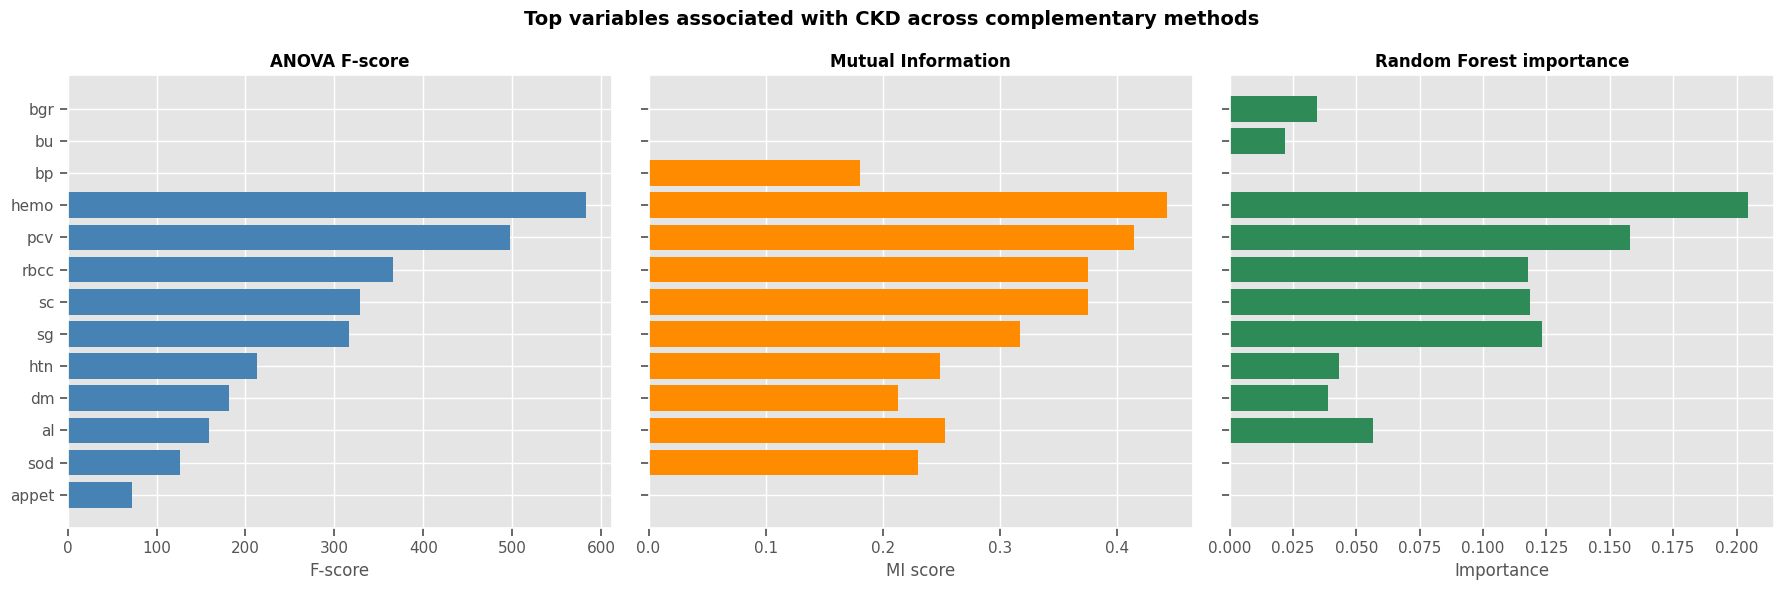

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Top 10 F-score
top_f = f_score_df.head(10).sort_values("F_Score")
axes[0].barh(top_f["Variable"], top_f["F_Score"], color="steelblue")
axes[0].set_title("ANOVA F-score", fontweight="bold")
axes[0].set_xlabel("F-score")

# Top 10 Mutual Information
top_mi = mi_df.head(10).sort_values("MI_Score")
axes[1].barh(top_mi["Variable"], top_mi["MI_Score"], color="darkorange")
axes[1].set_title("Mutual Information", fontweight="bold")
axes[1].set_xlabel("MI score")

# Top 10 Random Forest
top_rf = rf_df.head(10).sort_values("RF_Importance")
axes[2].barh(top_rf["Variable"], top_rf["RF_Importance"], color="seagreen")
axes[2].set_title("Random Forest importance", fontweight="bold")
axes[2].set_xlabel("Importance")

plt.suptitle("Top variables associated with CKD across complementary methods",
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


A post-hoc feature relevance analysis was performed to identify variables most strongly associated with CKD status, using three complementary approaches: ANOVA F-statistics, mutual information, and Random Forest feature importance.

Across all methods, anemia-related parameters (hemoglobin, packed cell volume, red blood cell count) consistently ranked as the most informative features, highlighting anemia as a dominant systemic manifestation of CKD. Serum creatinine and urinalysis markers (specific gravity and albuminuria) followed closely, reflecting both functional impairment and structural renal damage.

Cardiometabolic comorbidities such as hypertension and diabetes mellitus showed moderate but stable relevance, consistent with their role as risk factors rather than direct disease markers. Electrolyte and metabolic variables displayed weaker associations, indicating secondary systemic effects.

The strong agreement across statistical, information-theoretic, and model-based criteria supports the biological plausibility of the unsupervised clustering results and confirms that the intrinsic structure of the dataset aligns with established clinical knowledge of CKD.

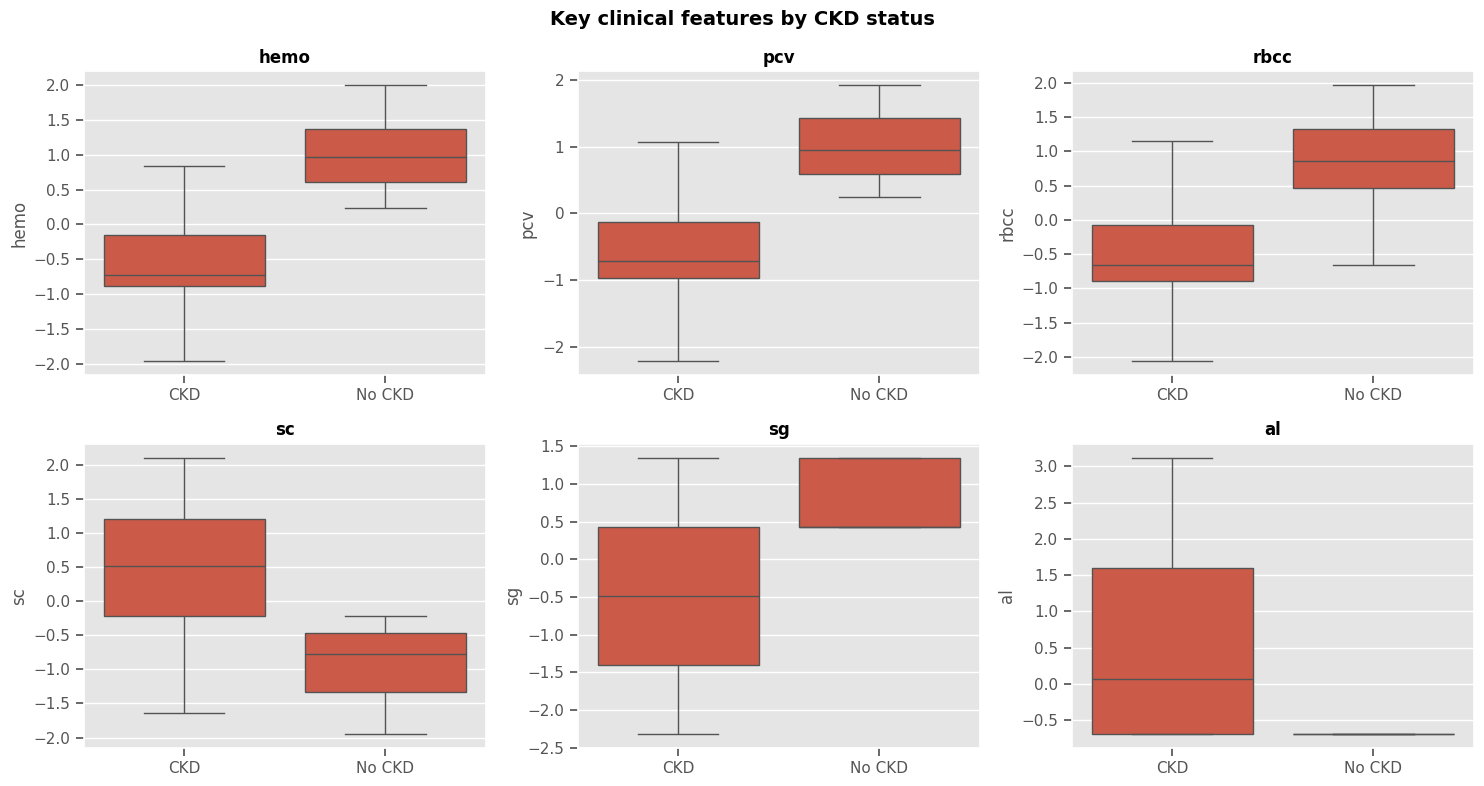

In [217]:
vars_to_plot = ["hemo", "pcv", "rbcc", "sc", "sg", "al"]

df_plot = df_final.copy()
df_plot["status_lbl"] = df_plot["status"].map({0: "No CKD", 1: "CKD"})

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, var in zip(axes, vars_to_plot):
    sns.boxplot(
        data=df_plot,
        x="status_lbl",
        y=var,
        ax=ax,
        showfliers=False
    )
    ax.set_title(var, fontweight="bold")
    ax.set_xlabel("")
    
plt.suptitle("Key clinical features by CKD status",
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()
